# Train and test AVIDNet

In [1]:
import torch
import os
from torchsummary import summary
from collections import defaultdict

from datasets.utils import get_data_transforms, separate_datasets, get_data_loaders, show_samples
from models.model import get_model
from models.train import train_model
from models.metrics import update_mean_metrics, print_metrics

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Load data

In [3]:
fold = 5
labeled_num_per_cls, mu = 25, 4
batch_size = 6
data_dir = 'data/CXR/train-test'
lb_partial_dir = 'train_lb/train_lb_'
dataset_types = ['train', 'test'] # ['train', 'val', 'test']

In [4]:
#separate_datasets(data_dir, fold, labeled_num_per_cls, mu)

{'train_lb': 75, 'train_ulb': 300, 'train_ulb_wa': 300, 'test': 1582}


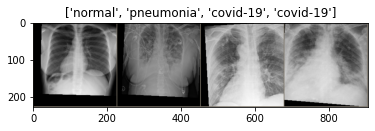

In [5]:
data_transforms = get_data_transforms(purpose='fixaug1')
data_loaders, dataset_sizes, class_names = get_data_loaders(data_transforms, fold, batch_size, dataset_types,
                                                            data_dir, lb_partial_dir, purpose='fixaug1', mu=mu)
print(dataset_sizes)
show_samples(data_loaders, class_names, dataset_type='train_lb')

## Train the model

In [6]:
trained_models = []
cls_names = ['All', 'COVID-19', 'Pneumonia', 'Normal']
metric_types = ['acc'] # metric_types = ['acc', 'ppv', 'recall', 'f1']
mean_metrics = {m_type: defaultdict(float) for m_type in metric_types}
for i in range(fold):
    model_ft, criterion, optimizer_ft, exp_lr_scheduler = get_model(device, fine_tuning=False)
    model, metrics = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, i, cls_names,
                                 metric_types, dataset_types, data_loaders, dataset_sizes, device, num_epochs=100,
                                 lambda_u=1.0, threshold=0.95, purpose='fixmatch',is_early=False)
    trained_models.append(model)
    mean_metrics = update_mean_metrics(cls_names, mean_metrics, metrics, status='training')

mean_metrics = update_mean_metrics(cls_names, mean_metrics, status='final', fold=fold)
print_metrics(mean_metrics, cls_names, phase='Mean results')

--------------------
Model 1
--------------------

Epoch 0/99
----------
[train]
LOSS - 1.1568
ACC - All: 0.3200  COVID-19: 0.2800  Pneumonia: 0.2400  Normal: 0.4400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.0541
ACC - All: 0.4292  COVID-19: 0.8252  Pneumonia: 0.5763  Normal: 0.1414 

Epoch 1/99
----------
[train]
LOSS - 1.0779
ACC - All: 0.4400  COVID-19: 0.2000  Pneumonia: 0.7200  Normal: 0.4000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.3785
ACC - All: 0.1119  COVID-19: 0.9903  Pneumonia: 0.0000  Normal: 0.1263 

Epoch 2/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-kt4js_dq'


[train]
LOSS - 0.9625
ACC - All: 0.5200  COVID-19: 0.6000  Pneumonia: 0.4800  Normal: 0.4800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.7000
ACC - All: 0.7029  COVID-19: 0.0000  Pneumonia: 0.6237  Normal: 0.9428 

Epoch 3/99
----------
[train]
LOSS - 0.7993
ACC - All: 0.6533  COVID-19: 0.6400  Pneumonia: 0.6000  Normal: 0.7200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6389
ACC - All: 0.7870  COVID-19: 0.3398  Pneumonia: 0.9322  Normal: 0.6481 

Epoch 4/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-sqyf3pbr'


[train]
LOSS - 0.8708
ACC - All: 0.6400  COVID-19: 0.5600  Pneumonia: 0.8400  Normal: 0.5200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.9609
ACC - All: 0.4317  COVID-19: 0.0583  Pneumonia: 0.0949  Normal: 0.9983 

Epoch 5/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ptt8ksbx'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.7191
ACC - All: 0.7200  COVID-19: 0.4000  Pneumonia: 0.8000  Normal: 0.9600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.8710
ACC - All: 0.6264  COVID-19: 0.9223  Pneumonia: 0.7672  Normal: 0.3653 

Epoch 6/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-jwrfyym5'


[train]
LOSS - 0.7669
ACC - All: 0.6400  COVID-19: 0.7200  Pneumonia: 0.6000  Normal: 0.6000 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.6165
ACC - All: 0.7598  COVID-19: 0.2524  Pneumonia: 0.7006  Normal: 0.9360 

Epoch 7/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-w3c_trzk'


[train]
LOSS - 0.6604
ACC - All: 0.7333  COVID-19: 0.8000  Pneumonia: 0.6000  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6089
ACC - All: 0.7705  COVID-19: 0.3398  Pneumonia: 0.7175  Normal: 0.9242 

Epoch 8/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-bjfspacv'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6734
ACC - All: 0.7467  COVID-19: 0.7600  Pneumonia: 0.7200  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5720
ACC - All: 0.7895  COVID-19: 0.3010  Pneumonia: 0.7616  Normal: 0.9158 

Epoch 9/99
----------
[train]
LOSS - 0.6616
ACC - All: 0.7733  COVID-19: 0.7200  Pneumonia: 0.8800  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5253
ACC - All: 0.8085  COVID-19: 0.3592  Pneumonia: 0.8554  Normal: 0.8165 

Epoch 10/99
----------
[train]
LOSS - 0.6885
ACC - All: 0.7600  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5921
ACC - All: 0.7977  COVID-19: 0.4272  Pneumonia: 0.7661  Normal: 0.9091 

Epoch 11/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-lgf0nyrq'


[train]
LOSS - 0.7603
ACC - All: 0.7867  COVID-19: 0.7200  Pneumonia: 0.7600  Normal: 0.8800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.6354
ACC - All: 0.7415  COVID-19: 0.3204  Pneumonia: 0.6565  Normal: 0.9411 

Epoch 12/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-iu8t2d9w'


[train]
LOSS - 0.6062
ACC - All: 0.8133  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5465
ACC - All: 0.8021  COVID-19: 0.2913  Pneumonia: 0.7921  Normal: 0.9057 

Epoch 13/99
----------
[train]
LOSS - 0.5577
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5426
ACC - All: 0.8040  COVID-19: 0.2621  Pneumonia: 0.8102  Normal: 0.8889 

Epoch 14/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-dmpb0qyq'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6180
ACC - All: 0.7867  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5179
ACC - All: 0.8129  COVID-19: 0.2621  Pneumonia: 0.8316  Normal: 0.8805 

Epoch 15/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-zuz1hw8_'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6714
ACC - All: 0.7733  COVID-19: 0.7200  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5393
ACC - All: 0.8123  COVID-19: 0.3689  Pneumonia: 0.8215  Normal: 0.8754 

Epoch 16/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-tfdwr_xm'


[train]
LOSS - 0.5514
ACC - All: 0.8267  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.9200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5703
ACC - All: 0.8066  COVID-19: 0.3981  Pneumonia: 0.7932  Normal: 0.8973 

Epoch 17/99
----------
[train]
LOSS - 0.5888
ACC - All: 0.8400  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5453
ACC - All: 0.8129  COVID-19: 0.3592  Pneumonia: 0.8124  Normal: 0.8923 

Epoch 18/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-qg4qja4o'


[train]
LOSS - 0.5213
ACC - All: 0.8000  COVID-19: 0.7600  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5206
ACC - All: 0.8148  COVID-19: 0.3010  Pneumonia: 0.8463  Normal: 0.8569 

Epoch 19/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-g8su5iad'


[train]
LOSS - 0.6458
ACC - All: 0.8000  COVID-19: 0.7600  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5378
ACC - All: 0.8009  COVID-19: 0.2330  Pneumonia: 0.8011  Normal: 0.8990 

Epoch 20/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-3if2cfh8'


[train]
LOSS - 0.5773
ACC - All: 0.8000  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5306
ACC - All: 0.8059  COVID-19: 0.2621  Pneumonia: 0.8147  Normal: 0.8872 

Epoch 21/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ohss7p__'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6025
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.7200  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5252
ACC - All: 0.8104  COVID-19: 0.2816  Pneumonia: 0.8271  Normal: 0.8771 

Epoch 22/99
----------
[train]
LOSS - 0.5807
ACC - All: 0.8267  COVID-19: 0.8400  Pneumonia: 0.7200  Normal: 0.9200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5511
ACC - All: 0.8097  COVID-19: 0.3689  Pneumonia: 0.8079  Normal: 0.8889 

Epoch 23/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-bojmix8b'


[train]
LOSS - 0.5670
ACC - All: 0.7867  COVID-19: 0.6800  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5543
ACC - All: 0.7952  COVID-19: 0.3010  Pneumonia: 0.7808  Normal: 0.9024 

Epoch 24/99
----------
[train]
LOSS - 0.6702
ACC - All: 0.7333  COVID-19: 0.7200  Pneumonia: 0.7200  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5360
ACC - All: 0.8167  COVID-19: 0.3301  Pneumonia: 0.8215  Normal: 0.8939 

Epoch 25/99
----------
[train]
LOSS - 0.5924
ACC - All: 0.7600  COVID-19: 0.7200  Pneumonia: 0.7200  Normal: 0.8400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5535
ACC - All: 0.8135  COVID-19: 0.3689  Pneumonia: 0.8124  Normal: 0.8923 

Epoch 26/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-d2akhu39'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.8054
ACC - All: 0.7600  COVID-19: 0.8000  Pneumonia: 0.7200  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5452
ACC - All: 0.8078  COVID-19: 0.3398  Pneumonia: 0.8045  Normal: 0.8939 

Epoch 27/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-14wlvbze'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5756
ACC - All: 0.8400  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5369
ACC - All: 0.8148  COVID-19: 0.3592  Pneumonia: 0.8192  Normal: 0.8872 

Epoch 28/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-659pa_g4'


[train]
LOSS - 0.6651
ACC - All: 0.7733  COVID-19: 0.7200  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5435
ACC - All: 0.8104  COVID-19: 0.3204  Pneumonia: 0.8068  Normal: 0.9007 

Epoch 29/99
----------
[train]
LOSS - 0.5626
ACC - All: 0.8267  COVID-19: 0.8400  Pneumonia: 0.8800  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5525
ACC - All: 0.8091  COVID-19: 0.3786  Pneumonia: 0.8034  Normal: 0.8923 

Epoch 30/99
----------
[train]
LOSS - 0.6493
ACC - All: 0.7867  COVID-19: 0.7200  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5334
ACC - All: 0.7977  COVID-19: 0.2136  Pneumonia: 0.8034  Normal: 0.8906 

Epoch 31/99
----------
[train]
LOSS - 0.6187
ACC - All: 0.8800  COVID-19: 0.8800  Pneumonia: 0.8800  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5270
ACC - All: 0.8078  COVID-19: 0.2330  Pneumonia: 0.8249  Normal: 0.88

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-t20bxiaw'


[train]
LOSS - 0.5909
ACC - All: 0.7733  COVID-19: 0.6800  Pneumonia: 0.7600  Normal: 0.8800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5639
ACC - All: 0.7819  COVID-19: 0.2330  Pneumonia: 0.7582  Normal: 0.9125 

Epoch 33/99
----------
[train]
LOSS - 0.6210
ACC - All: 0.8133  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5319
ACC - All: 0.8047  COVID-19: 0.2524  Pneumonia: 0.8102  Normal: 0.8923 

Epoch 34/99
----------
[train]
LOSS - 0.5585
ACC - All: 0.8400  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.9200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5405
ACC - All: 0.8009  COVID-19: 0.2427  Pneumonia: 0.7944  Normal: 0.9074 

Epoch 35/99
----------
[train]
LOSS - 0.6481
ACC - All: 0.8267  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5570
ACC - All: 0.8028  COVID-19: 0.3689  Pneumonia: 0.7921  Normal: 0.8939 

Epoch 36/99
----------
[t

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ger07z1i'


[train]
LOSS - 0.5798
ACC - All: 0.8533  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.9200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5431
ACC - All: 0.8110  COVID-19: 0.3592  Pneumonia: 0.8158  Normal: 0.8822 

Epoch 38/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-3dgu6ths'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6273
ACC - All: 0.8133  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5250
ACC - All: 0.8028  COVID-19: 0.2330  Pneumonia: 0.8124  Normal: 0.8872 

Epoch 39/99
----------
[train]
LOSS - 0.5970
ACC - All: 0.7600  COVID-19: 0.7200  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5380
ACC - All: 0.8066  COVID-19: 0.3107  Pneumonia: 0.8034  Normal: 0.8973 

Epoch 40/99
----------
[train]
LOSS - 0.5899
ACC - All: 0.7733  COVID-19: 0.7600  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5209
ACC - All: 0.8047  COVID-19: 0.1845  Pneumonia: 0.8226  Normal: 0.8855 

Epoch 41/99
----------
[train]
LOSS - 0.6070
ACC - All: 0.8267  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5367
ACC - All: 0.7971  COVID-19: 0.2039  Pneumonia: 0.7989  Normal: 0.89

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-njdr2f1m'


[train]
LOSS - 0.5258
ACC - All: 0.8533  COVID-19: 0.7600  Pneumonia: 0.8000  Normal: 1.0000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5270
ACC - All: 0.8142  COVID-19: 0.3689  Pneumonia: 0.8520  Normal: 0.8350 

Epoch 43/99
----------
[train]
LOSS - 0.5784
ACC - All: 0.8267  COVID-19: 0.8400  Pneumonia: 0.8800  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5325
ACC - All: 0.8110  COVID-19: 0.2718  Pneumonia: 0.8203  Normal: 0.8906 

Epoch 44/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-tfmv4ldw'


[train]
LOSS - 0.6246
ACC - All: 0.7867  COVID-19: 0.6400  Pneumonia: 0.8000  Normal: 0.9200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5414
ACC - All: 0.8135  COVID-19: 0.3689  Pneumonia: 0.8328  Normal: 0.8620 

Epoch 45/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-b06swknp'


[train]
LOSS - 0.6904
ACC - All: 0.7600  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5273
ACC - All: 0.8142  COVID-19: 0.3495  Pneumonia: 0.8294  Normal: 0.8721 

Epoch 46/99
----------
[train]
LOSS - 0.6392
ACC - All: 0.7467  COVID-19: 0.6800  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5389
ACC - All: 0.7996  COVID-19: 0.2718  Pneumonia: 0.7887  Normal: 0.9074 

Epoch 47/99
----------
[train]
LOSS - 0.5708
ACC - All: 0.8400  COVID-19: 0.8400  Pneumonia: 0.8800  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5392
ACC - All: 0.7914  COVID-19: 0.1748  Pneumonia: 0.7887  Normal: 0.9024 

Epoch 48/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-imvvhp0h'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5780
ACC - All: 0.7867  COVID-19: 0.8000  Pneumonia: 0.7200  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5291
ACC - All: 0.8085  COVID-19: 0.2621  Pneumonia: 0.8215  Normal: 0.8838 

Epoch 49/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-lbpms7ku'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.7100
ACC - All: 0.7333  COVID-19: 0.7600  Pneumonia: 0.7200  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5572
ACC - All: 0.7996  COVID-19: 0.3495  Pneumonia: 0.7910  Normal: 0.8906 

Epoch 50/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-25pmq9vr'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5682
ACC - All: 0.8400  COVID-19: 0.7600  Pneumonia: 0.9200  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5363
ACC - All: 0.8129  COVID-19: 0.3010  Pneumonia: 0.8192  Normal: 0.8923 

Epoch 51/99
----------
[train]
LOSS - 0.5963
ACC - All: 0.7467  COVID-19: 0.7600  Pneumonia: 0.7200  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5283
ACC - All: 0.8192  COVID-19: 0.3592  Pneumonia: 0.8384  Normal: 0.8704 

Epoch 52/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ch476kt3'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5663
ACC - All: 0.8133  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5473
ACC - All: 0.8097  COVID-19: 0.3204  Pneumonia: 0.8090  Normal: 0.8956 

Epoch 53/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-_nowpvqb'


[train]
LOSS - 0.6192
ACC - All: 0.7600  COVID-19: 0.7600  Pneumonia: 0.7200  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5387
ACC - All: 0.8173  COVID-19: 0.3592  Pneumonia: 0.8226  Normal: 0.8889 

Epoch 54/99
----------
[train]
LOSS - 0.5566
ACC - All: 0.8400  COVID-19: 0.7600  Pneumonia: 0.8800  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5542
ACC - All: 0.8091  COVID-19: 0.3981  Pneumonia: 0.8090  Normal: 0.8805 

Epoch 55/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-weyjil19'


[train]
LOSS - 0.6284
ACC - All: 0.7867  COVID-19: 0.6800  Pneumonia: 0.7600  Normal: 0.9200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5330
ACC - All: 0.8110  COVID-19: 0.3786  Pneumonia: 0.8192  Normal: 0.8737 

Epoch 56/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-7q8t7m37'


[train]
LOSS - 0.5674
ACC - All: 0.8400  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5433
ACC - All: 0.8003  COVID-19: 0.2718  Pneumonia: 0.8000  Normal: 0.8923 

Epoch 57/99
----------
[train]
LOSS - 0.6697
ACC - All: 0.7467  COVID-19: 0.7200  Pneumonia: 0.7200  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5760
ACC - All: 0.8097  COVID-19: 0.4466  Pneumonia: 0.7898  Normal: 0.9024 

Epoch 58/99
----------
[train]
LOSS - 0.6468
ACC - All: 0.7733  COVID-19: 0.7200  Pneumonia: 0.7200  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5531
ACC - All: 0.8097  COVID-19: 0.3883  Pneumonia: 0.8102  Normal: 0.8822 

Epoch 59/99
----------
[train]
LOSS - 0.5337
ACC - All: 0.8400  COVID-19: 0.7200  Pneumonia: 0.9200  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5354
ACC - All: 0.8142  COVID-19: 0.3592  Pneumonia: 0.8339  Normal: 0.86

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-7v2k076i'


[train]
LOSS - 0.6076
ACC - All: 0.7333  COVID-19: 0.6800  Pneumonia: 0.7200  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5392
ACC - All: 0.7996  COVID-19: 0.2427  Pneumonia: 0.7932  Normal: 0.9057 

Epoch 61/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-bjsblj96'


[train]
LOSS - 0.6064
ACC - All: 0.7600  COVID-19: 0.7200  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5371
ACC - All: 0.8173  COVID-19: 0.3495  Pneumonia: 0.8215  Normal: 0.8923 

Epoch 62/99
----------
[train]
LOSS - 0.6052
ACC - All: 0.7733  COVID-19: 0.6800  Pneumonia: 0.7600  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5212
ACC - All: 0.8167  COVID-19: 0.3301  Pneumonia: 0.8282  Normal: 0.8838 

Epoch 63/99
----------
[train]
LOSS - 0.5879
ACC - All: 0.7867  COVID-19: 0.7600  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5460
ACC - All: 0.7933  COVID-19: 0.2233  Pneumonia: 0.7819  Normal: 0.9091 

Epoch 64/99
----------
[train]
LOSS - 0.6359
ACC - All: 0.7333  COVID-19: 0.7600  Pneumonia: 0.8000  Normal: 0.6400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5406
ACC - All: 0.8135  COVID-19: 0.3981  Pneumonia: 0.8203  Normal: 0.87

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-1scbir6n'


[train]
LOSS - 0.5336
ACC - All: 0.8267  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5297
ACC - All: 0.8135  COVID-19: 0.3204  Pneumonia: 0.8249  Normal: 0.8822 

Epoch 66/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-xb4008e0'


[train]
LOSS - 0.5670
ACC - All: 0.8533  COVID-19: 0.7600  Pneumonia: 0.9200  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5516
ACC - All: 0.8059  COVID-19: 0.3010  Pneumonia: 0.8023  Normal: 0.8990 

Epoch 67/99
----------
[train]
LOSS - 0.5338
ACC - All: 0.8933  COVID-19: 0.8800  Pneumonia: 0.8800  Normal: 0.9200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5280
ACC - All: 0.8097  COVID-19: 0.2816  Pneumonia: 0.8249  Normal: 0.8788 

Epoch 68/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ta07k0tm'


[train]
LOSS - 0.7088
ACC - All: 0.7867  COVID-19: 0.6400  Pneumonia: 0.8400  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5265
ACC - All: 0.8142  COVID-19: 0.3495  Pneumonia: 0.8328  Normal: 0.8670 

Epoch 69/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-fqyoc67u'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6078
ACC - All: 0.8267  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5333
ACC - All: 0.8110  COVID-19: 0.3010  Pneumonia: 0.8147  Normal: 0.8939 

Epoch 70/99
----------
[train]
LOSS - 0.6164
ACC - All: 0.8000  COVID-19: 0.7200  Pneumonia: 0.8800  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5326
ACC - All: 0.8135  COVID-19: 0.3495  Pneumonia: 0.8362  Normal: 0.8603 

Epoch 71/99
----------
[train]
LOSS - 0.6069
ACC - All: 0.8133  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5667
ACC - All: 0.7876  COVID-19: 0.2913  Pneumonia: 0.7616  Normal: 0.9125 

Epoch 72/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-n4yif2aa'


[train]
LOSS - 0.5317
ACC - All: 0.8400  COVID-19: 0.7600  Pneumonia: 0.9600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5295
ACC - All: 0.8123  COVID-19: 0.2913  Pneumonia: 0.8203  Normal: 0.8906 

Epoch 73/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-p4nfwshy'


[train]
LOSS - 0.6836
ACC - All: 0.7333  COVID-19: 0.7600  Pneumonia: 0.6800  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5394
ACC - All: 0.8129  COVID-19: 0.3495  Pneumonia: 0.8226  Normal: 0.8788 

Epoch 74/99
----------
[train]
LOSS - 0.6597
ACC - All: 0.7733  COVID-19: 0.6400  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5756
ACC - All: 0.7965  COVID-19: 0.3689  Pneumonia: 0.7740  Normal: 0.9040 

Epoch 75/99
----------
[train]
LOSS - 0.6038
ACC - All: 0.7600  COVID-19: 0.7200  Pneumonia: 0.7200  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5539
ACC - All: 0.8091  COVID-19: 0.3592  Pneumonia: 0.8056  Normal: 0.8923 

Epoch 76/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-1jkpvcpl'


[train]
LOSS - 0.5786
ACC - All: 0.7733  COVID-19: 0.7600  Pneumonia: 0.7200  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5440
ACC - All: 0.8066  COVID-19: 0.3204  Pneumonia: 0.8045  Normal: 0.8939 

Epoch 77/99
----------
[train]
LOSS - 0.5680
ACC - All: 0.8267  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5769
ACC - All: 0.7826  COVID-19: 0.3301  Pneumonia: 0.7435  Normal: 0.9192 

Epoch 78/99
----------
[train]
LOSS - 0.7383
ACC - All: 0.7733  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5176
ACC - All: 0.8047  COVID-19: 0.2136  Pneumonia: 0.8271  Normal: 0.8737 

Epoch 79/99
----------
[train]
LOSS - 0.5221
ACC - All: 0.9067  COVID-19: 0.8800  Pneumonia: 0.9200  Normal: 0.9200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5409
ACC - All: 0.7965  COVID-19: 0.2330  Pneumonia: 0.7887  Normal: 0.9057 

Epoch 80/9

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-mh2xyb5g'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6801
ACC - All: 0.7467  COVID-19: 0.7200  Pneumonia: 0.8000  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5508
ACC - All: 0.7914  COVID-19: 0.2621  Pneumonia: 0.7751  Normal: 0.9074 

Epoch 81/99
----------
[train]
LOSS - 0.5748
ACC - All: 0.8267  COVID-19: 0.8800  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5388
ACC - All: 0.8123  COVID-19: 0.3495  Pneumonia: 0.8181  Normal: 0.8838 

Epoch 82/99
----------
[train]
LOSS - 0.5950
ACC - All: 0.8000  COVID-19: 0.7200  Pneumonia: 0.8800  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5456
ACC - All: 0.7996  COVID-19: 0.3010  Pneumonia: 0.7887  Normal: 0.9024 

Epoch 83/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-bu9sgxt4'


[train]
LOSS - 0.5969
ACC - All: 0.8267  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5580
ACC - All: 0.8047  COVID-19: 0.3398  Pneumonia: 0.7955  Normal: 0.8990 

Epoch 84/99
----------
[train]
LOSS - 0.5716
ACC - All: 0.7867  COVID-19: 0.7600  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5393
ACC - All: 0.8104  COVID-19: 0.3398  Pneumonia: 0.8169  Normal: 0.8822 

Epoch 85/99
----------
[train]
LOSS - 0.7739
ACC - All: 0.6800  COVID-19: 0.8000  Pneumonia: 0.6400  Normal: 0.6000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5381
ACC - All: 0.8180  COVID-19: 0.3883  Pneumonia: 0.8249  Normal: 0.8822 

Epoch 86/99
----------
[train]
LOSS - 0.5822
ACC - All: 0.8133  COVID-19: 0.9200  Pneumonia: 0.7200  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5313
ACC - All: 0.8142  COVID-19: 0.3107  Pneumonia: 0.8282  Normal: 0.88

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-b3l1badv'


[train]
LOSS - 0.6394
ACC - All: 0.7867  COVID-19: 0.7200  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5366
ACC - All: 0.8028  COVID-19: 0.3107  Pneumonia: 0.7966  Normal: 0.8973 

Epoch 88/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-oh49uf7j'


[train]
LOSS - 0.6003
ACC - All: 0.7600  COVID-19: 0.8800  Pneumonia: 0.7200  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5352
ACC - All: 0.8161  COVID-19: 0.3398  Pneumonia: 0.8203  Normal: 0.8923 

Epoch 89/99
----------
[train]
LOSS - 0.5547
ACC - All: 0.8400  COVID-19: 0.7200  Pneumonia: 0.9200  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5499
ACC - All: 0.8104  COVID-19: 0.3689  Pneumonia: 0.8102  Normal: 0.8872 

Epoch 90/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ajluzw60'


[train]
LOSS - 0.6008
ACC - All: 0.7600  COVID-19: 0.6800  Pneumonia: 0.7600  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5444
ACC - All: 0.8059  COVID-19: 0.3107  Pneumonia: 0.8011  Normal: 0.8990 

Epoch 91/99
----------
[train]
LOSS - 0.5654
ACC - All: 0.8667  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.9200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5301
ACC - All: 0.8047  COVID-19: 0.2233  Pneumonia: 0.8226  Normal: 0.8788 

Epoch 92/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-95e_oq1x'


[train]
LOSS - 0.6296
ACC - All: 0.7867  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5257
ACC - All: 0.8161  COVID-19: 0.2913  Pneumonia: 0.8373  Normal: 0.8754 

Epoch 93/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-u265ble2'


[train]
LOSS - 0.6265
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5509
ACC - All: 0.7908  COVID-19: 0.2524  Pneumonia: 0.7763  Normal: 0.9057 

Epoch 94/99
----------
[train]
LOSS - 0.7206
ACC - All: 0.7467  COVID-19: 0.7600  Pneumonia: 0.7600  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5398
ACC - All: 0.8047  COVID-19: 0.2913  Pneumonia: 0.8068  Normal: 0.8906 

Epoch 95/99
----------
[train]
LOSS - 0.7160
ACC - All: 0.7467  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5457
ACC - All: 0.8085  COVID-19: 0.3689  Pneumonia: 0.8124  Normal: 0.8788 

Epoch 96/99
----------
[train]
LOSS - 0.6755
ACC - All: 0.7600  COVID-19: 0.7200  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5538
ACC - All: 0.8072  COVID-19: 0.4078  Pneumonia: 0.8203  Normal: 0.85

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-v0e28wov'


[train]
LOSS - 0.6626
ACC - All: 0.6800  COVID-19: 0.7200  Pneumonia: 0.6800  Normal: 0.6400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5303
ACC - All: 0.7990  COVID-19: 0.2039  Pneumonia: 0.7955  Normal: 0.9074 


--------------------
[Best results]
ACC - All: 0.7990  COVID-19: 0.2039  Pneumonia: 0.7955  Normal: 0.9074 

Training complete in 67m 3s
-------------------- 

--------------------
Model 2
--------------------

Epoch 0/99
----------
[train]
LOSS - 1.1512
ACC - All: 0.3467  COVID-19: 0.3600  Pneumonia: 0.1600  Normal: 0.5200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.8539
ACC - All: 0.6662  COVID-19: 0.0000  Pneumonia: 0.9492  Normal: 0.3603 

Epoch 1/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-btxd5kq7'


[train]
LOSS - 1.1453
ACC - All: 0.4400  COVID-19: 0.4000  Pneumonia: 0.6000  Normal: 0.3200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.8871
ACC - All: 0.4823  COVID-19: 0.0777  Pneumonia: 0.1910  Normal: 0.9865 

Epoch 2/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ojbuf3fu'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.8623
ACC - All: 0.6000  COVID-19: 0.6000  Pneumonia: 0.9200  Normal: 0.2800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.7725
ACC - All: 0.5841  COVID-19: 0.0000  Pneumonia: 0.4011  Normal: 0.9579 

Epoch 3/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-8121kdob'


[train]
LOSS - 0.8647
ACC - All: 0.5733  COVID-19: 0.6000  Pneumonia: 0.4000  Normal: 0.7200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5907
ACC - All: 0.7781  COVID-19: 0.1456  Pneumonia: 0.9469  Normal: 0.6364 

Epoch 4/99
----------
[train]
LOSS - 0.8617
ACC - All: 0.6133  COVID-19: 0.5600  Pneumonia: 0.5600  Normal: 0.7200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5630
ACC - All: 0.7977  COVID-19: 0.2816  Pneumonia: 0.9096  Normal: 0.7205 

Epoch 5/99
----------
[train]
LOSS - 0.6441
ACC - All: 0.7600  COVID-19: 0.7200  Pneumonia: 0.8400  Normal: 0.7200 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.6705
ACC - All: 0.7250  COVID-19: 0.2136  Pneumonia: 0.6520  Normal: 0.9226 

Epoch 6/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-vr0gn7wa'


[train]
LOSS - 0.7243
ACC - All: 0.6800  COVID-19: 0.6400  Pneumonia: 0.7200  Normal: 0.6800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6068
ACC - All: 0.7579  COVID-19: 0.1456  Pneumonia: 0.7356  Normal: 0.8973 

Epoch 7/99
----------
[train]
LOSS - 0.7327
ACC - All: 0.6933  COVID-19: 0.7600  Pneumonia: 0.6800  Normal: 0.6400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5348
ACC - All: 0.7939  COVID-19: 0.1748  Pneumonia: 0.8395  Normal: 0.8333 

Epoch 8/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-yhdddjx_'


[train]
LOSS - 0.6352
ACC - All: 0.7600  COVID-19: 0.7200  Pneumonia: 0.7200  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5343
ACC - All: 0.7908  COVID-19: 0.1456  Pneumonia: 0.8373  Normal: 0.8333 

Epoch 9/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ylnr1rh5'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.7228
ACC - All: 0.7733  COVID-19: 0.7600  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5785
ACC - All: 0.7737  COVID-19: 0.2330  Pneumonia: 0.7695  Normal: 0.8737 

Epoch 10/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-7gc6upjp'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6431
ACC - All: 0.8400  COVID-19: 0.9200  Pneumonia: 0.7200  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5272
ACC - All: 0.7914  COVID-19: 0.1845  Pneumonia: 0.8373  Normal: 0.8283 

Epoch 11/99
----------
[train]
LOSS - 0.6249
ACC - All: 0.8000  COVID-19: 0.8400  Pneumonia: 0.9600  Normal: 0.6000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5192
ACC - All: 0.7939  COVID-19: 0.1748  Pneumonia: 0.8689  Normal: 0.7896 

Epoch 12/99
----------
[train]
LOSS - 0.5724
ACC - All: 0.8400  COVID-19: 0.8800  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5353
ACC - All: 0.7882  COVID-19: 0.1845  Pneumonia: 0.8282  Normal: 0.8333 

Epoch 13/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-as11v7qb'


[train]
LOSS - 0.5570
ACC - All: 0.8400  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5292
ACC - All: 0.7927  COVID-19: 0.1359  Pneumonia: 0.8531  Normal: 0.8165 

Epoch 14/99
----------
[train]
LOSS - 0.6246
ACC - All: 0.8533  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5491
ACC - All: 0.7832  COVID-19: 0.1845  Pneumonia: 0.8023  Normal: 0.8586 

Epoch 15/99
----------
[train]
LOSS - 0.5376
ACC - All: 0.8000  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5672
ACC - All: 0.7705  COVID-19: 0.1456  Pneumonia: 0.7684  Normal: 0.8822 

Epoch 16/99
----------
[train]
LOSS - 0.5793
ACC - All: 0.8667  COVID-19: 0.9600  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5436
ACC - All: 0.7876  COVID-19: 0.1650  Pneumonia: 0.8215  Normal: 0.8451 

Epoch 17/9

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-t25mp699'


[train]
LOSS - 0.6193
ACC - All: 0.8667  COVID-19: 0.9200  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5453
ACC - All: 0.7863  COVID-19: 0.1748  Pneumonia: 0.8169  Normal: 0.8468 

Epoch 19/99
----------
[train]
LOSS - 0.5735
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5435
ACC - All: 0.7838  COVID-19: 0.1553  Pneumonia: 0.8169  Normal: 0.8434 

Epoch 20/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-faishhzb'


[train]
LOSS - 0.5223
ACC - All: 0.8800  COVID-19: 0.9200  Pneumonia: 0.8800  Normal: 0.8400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5481
ACC - All: 0.7863  COVID-19: 0.1845  Pneumonia: 0.8113  Normal: 0.8535 

Epoch 21/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-nji2dr8b'


[train]
LOSS - 0.6928
ACC - All: 0.7467  COVID-19: 0.6800  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5275
ACC - All: 0.7876  COVID-19: 0.1262  Pneumonia: 0.8441  Normal: 0.8182 

Epoch 22/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-nk6qb42b'


[train]
LOSS - 0.6736
ACC - All: 0.8133  COVID-19: 0.8000  Pneumonia: 0.7200  Normal: 0.9200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5496
ACC - All: 0.7813  COVID-19: 0.1845  Pneumonia: 0.8068  Normal: 0.8468 

Epoch 23/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-25g1uvwa'


[train]
LOSS - 0.6001
ACC - All: 0.7733  COVID-19: 0.7600  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5391
ACC - All: 0.7863  COVID-19: 0.1456  Pneumonia: 0.8271  Normal: 0.8367 

Epoch 24/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-_mupq5oe'


[train]
LOSS - 0.5218
ACC - All: 0.8667  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.8800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5343
ACC - All: 0.7889  COVID-19: 0.1359  Pneumonia: 0.8373  Normal: 0.8300 

Epoch 25/99
----------
[train]
LOSS - 0.6038
ACC - All: 0.7867  COVID-19: 0.7600  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5277
ACC - All: 0.7914  COVID-19: 0.1748  Pneumonia: 0.8418  Normal: 0.8232 

Epoch 26/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-_z92hm03'


[train]
LOSS - 0.6657
ACC - All: 0.8267  COVID-19: 0.8800  Pneumonia: 0.7600  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5280
ACC - All: 0.7927  COVID-19: 0.1748  Pneumonia: 0.8441  Normal: 0.8232 

Epoch 27/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-86w5grhk'


[train]
LOSS - 0.5957
ACC - All: 0.8133  COVID-19: 0.8800  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5370
ACC - All: 0.7901  COVID-19: 0.1359  Pneumonia: 0.8339  Normal: 0.8384 

Epoch 28/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-gcs0krcs'


[train]
LOSS - 0.6400
ACC - All: 0.7867  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5188
ACC - All: 0.7914  COVID-19: 0.1553  Pneumonia: 0.8565  Normal: 0.8047 

Epoch 29/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-wz7frecx'


[train]
LOSS - 0.5141
ACC - All: 0.8667  COVID-19: 0.9600  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5249
ACC - All: 0.7914  COVID-19: 0.1748  Pneumonia: 0.8362  Normal: 0.8316 

Epoch 30/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-judtfgw1'


[train]
LOSS - 0.5979
ACC - All: 0.8000  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5358
ACC - All: 0.7901  COVID-19: 0.1942  Pneumonia: 0.8282  Normal: 0.8367 

Epoch 31/99
----------
[train]
LOSS - 0.6267
ACC - All: 0.8400  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.8400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5305
ACC - All: 0.7889  COVID-19: 0.1456  Pneumonia: 0.8429  Normal: 0.8199 

Epoch 32/99
----------
[train]
LOSS - 0.6016
ACC - All: 0.8533  COVID-19: 0.9200  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5402
ACC - All: 0.7882  COVID-19: 0.1748  Pneumonia: 0.8226  Normal: 0.8434 

Epoch 33/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-11nqdf2x'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6162
ACC - All: 0.7600  COVID-19: 0.7600  Pneumonia: 0.7200  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5239
ACC - All: 0.7920  COVID-19: 0.1553  Pneumonia: 0.8463  Normal: 0.8215 

Epoch 34/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-fsey0ht6'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6194
ACC - All: 0.8000  COVID-19: 0.9200  Pneumonia: 0.7200  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5468
ACC - All: 0.7813  COVID-19: 0.1748  Pneumonia: 0.8102  Normal: 0.8434 

Epoch 35/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-becmmd5v'


[train]
LOSS - 0.6549
ACC - All: 0.8000  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5356
ACC - All: 0.7889  COVID-19: 0.1553  Pneumonia: 0.8316  Normal: 0.8350 

Epoch 36/99
----------
[train]
LOSS - 0.6353
ACC - All: 0.7600  COVID-19: 0.7600  Pneumonia: 0.7600  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5512
ACC - All: 0.7826  COVID-19: 0.1359  Pneumonia: 0.8113  Normal: 0.8519 

Epoch 37/99
----------
[train]
LOSS - 0.6254
ACC - All: 0.7867  COVID-19: 0.8000  Pneumonia: 0.6800  Normal: 0.8800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5349
ACC - All: 0.7895  COVID-19: 0.1650  Pneumonia: 0.8339  Normal: 0.8316 

Epoch 38/99
----------
[train]
LOSS - 0.6049
ACC - All: 0.8267  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5476
ACC - All: 0.7870  COVID-19: 0.1553  Pneumonia: 0.8181  Normal: 0.8502 

Epoch 39/9

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-mjl4_swn'


[train]
LOSS - 0.6021
ACC - All: 0.8400  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5335
ACC - All: 0.7927  COVID-19: 0.1650  Pneumonia: 0.8407  Normal: 0.8300 

Epoch 41/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-866ffpti'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6116
ACC - All: 0.8133  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5549
ACC - All: 0.7845  COVID-19: 0.1748  Pneumonia: 0.8023  Normal: 0.8636 

Epoch 42/99
----------
[train]
LOSS - 0.5959
ACC - All: 0.8133  COVID-19: 0.7600  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5498
ACC - All: 0.7845  COVID-19: 0.1845  Pneumonia: 0.8034  Normal: 0.8603 

Epoch 43/99
----------
[train]
LOSS - 0.5788
ACC - All: 0.8000  COVID-19: 0.9600  Pneumonia: 0.7200  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5552
ACC - All: 0.7819  COVID-19: 0.1748  Pneumonia: 0.8034  Normal: 0.8552 

Epoch 44/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-xry689m9'


[train]
LOSS - 0.6385
ACC - All: 0.8267  COVID-19: 0.9200  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5327
ACC - All: 0.7901  COVID-19: 0.1359  Pneumonia: 0.8395  Normal: 0.8300 

Epoch 45/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-gu6o23xu'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6433
ACC - All: 0.8133  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5365
ACC - All: 0.7838  COVID-19: 0.1456  Pneumonia: 0.8169  Normal: 0.8451 

Epoch 46/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-n9v7vm4_'


[train]
LOSS - 0.6326
ACC - All: 0.8000  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5432
ACC - All: 0.7832  COVID-19: 0.1359  Pneumonia: 0.8181  Normal: 0.8434 

Epoch 47/99
----------
[train]
LOSS - 0.6815
ACC - All: 0.8267  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5373
ACC - All: 0.7819  COVID-19: 0.1553  Pneumonia: 0.8102  Normal: 0.8485 

Epoch 48/99
----------
[train]
LOSS - 0.6245
ACC - All: 0.8267  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5501
ACC - All: 0.7832  COVID-19: 0.1650  Pneumonia: 0.8034  Normal: 0.8603 

Epoch 49/99
----------
[train]
LOSS - 0.6699
ACC - All: 0.8133  COVID-19: 0.8800  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5454
ACC - All: 0.7800  COVID-19: 0.1553  Pneumonia: 0.8023  Normal: 0.85

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-7kz76xda'


[train]
LOSS - 0.5250
ACC - All: 0.8267  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5378
ACC - All: 0.7908  COVID-19: 0.1845  Pneumonia: 0.8282  Normal: 0.8401 

Epoch 52/99
----------
[train]
LOSS - 0.5299
ACC - All: 0.8267  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5299
ACC - All: 0.7920  COVID-19: 0.1359  Pneumonia: 0.8441  Normal: 0.8283 

Epoch 53/99
----------
[train]
LOSS - 0.7251
ACC - All: 0.8267  COVID-19: 0.8800  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5333
ACC - All: 0.7908  COVID-19: 0.1845  Pneumonia: 0.8305  Normal: 0.8367 

Epoch 54/99
----------
[train]
LOSS - 0.5631
ACC - All: 0.8000  COVID-19: 0.8800  Pneumonia: 0.7200  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5490
ACC - All: 0.7845  COVID-19: 0.1650  Pneumonia: 0.8147  Normal: 0.84

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ir7wxjiu'


[train]
LOSS - 0.6413
ACC - All: 0.8400  COVID-19: 0.8000  Pneumonia: 0.9200  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5452
ACC - All: 0.7876  COVID-19: 0.1650  Pneumonia: 0.8136  Normal: 0.8569 

Epoch 62/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-xutcux5m'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5078
ACC - All: 0.8800  COVID-19: 0.9200  Pneumonia: 0.8800  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5372
ACC - All: 0.7895  COVID-19: 0.1845  Pneumonia: 0.8260  Normal: 0.8401 

Epoch 63/99
----------
[train]
LOSS - 0.5919
ACC - All: 0.8133  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5329
ACC - All: 0.7889  COVID-19: 0.1456  Pneumonia: 0.8328  Normal: 0.8350 

Epoch 64/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-n5hfsydi'


[train]
LOSS - 0.6485
ACC - All: 0.7600  COVID-19: 0.8000  Pneumonia: 0.7200  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5388
ACC - All: 0.7901  COVID-19: 0.1748  Pneumonia: 0.8294  Normal: 0.8384 

Epoch 65/99
----------
[train]
LOSS - 0.6103
ACC - All: 0.8267  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5594
ACC - All: 0.7775  COVID-19: 0.1456  Pneumonia: 0.7864  Normal: 0.8737 

Epoch 66/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-q1muaqv2'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6047
ACC - All: 0.7733  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5354
ACC - All: 0.7851  COVID-19: 0.1650  Pneumonia: 0.8215  Normal: 0.8384 

Epoch 67/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-uvmstr4w'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6356
ACC - All: 0.7867  COVID-19: 0.8400  Pneumonia: 0.7200  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5425
ACC - All: 0.7863  COVID-19: 0.1748  Pneumonia: 0.8181  Normal: 0.8451 

Epoch 68/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-1xc3glzc'


[train]
LOSS - 0.7151
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.8400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5527
ACC - All: 0.7813  COVID-19: 0.1456  Pneumonia: 0.8113  Normal: 0.8468 

Epoch 69/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-hgngfnus'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6045
ACC - All: 0.8400  COVID-19: 0.8400  Pneumonia: 0.9200  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5372
ACC - All: 0.7876  COVID-19: 0.1553  Pneumonia: 0.8249  Normal: 0.8418 

Epoch 70/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-0wlnpwkx'


[train]
LOSS - 0.7194
ACC - All: 0.8000  COVID-19: 0.7600  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5426
ACC - All: 0.7851  COVID-19: 0.1650  Pneumonia: 0.8192  Normal: 0.8418 

Epoch 71/99
----------
[train]
LOSS - 0.6028
ACC - All: 0.8000  COVID-19: 0.8800  Pneumonia: 0.7600  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5438
ACC - All: 0.7882  COVID-19: 0.1553  Pneumonia: 0.8215  Normal: 0.8485 

Epoch 72/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-bt0tamn8'


[train]
LOSS - 0.5911
ACC - All: 0.8133  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5254
ACC - All: 0.7908  COVID-19: 0.1262  Pneumonia: 0.8475  Normal: 0.8215 

Epoch 73/99
----------
[train]
LOSS - 0.4742
ACC - All: 0.8933  COVID-19: 0.8800  Pneumonia: 0.9200  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5360
ACC - All: 0.7914  COVID-19: 0.1845  Pneumonia: 0.8271  Normal: 0.8434 

Epoch 74/99
----------
[train]
LOSS - 0.5280
ACC - All: 0.8267  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5254
ACC - All: 0.7946  COVID-19: 0.1650  Pneumonia: 0.8531  Normal: 0.8165 

Epoch 75/99
----------
[train]
LOSS - 0.5479
ACC - All: 0.7733  COVID-19: 0.7200  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5387
ACC - All: 0.7914  COVID-19: 0.2039  Pneumonia: 0.8260  Normal: 0.84

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-imspsayf'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5825
ACC - All: 0.8800  COVID-19: 0.9200  Pneumonia: 0.8400  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5413
ACC - All: 0.7857  COVID-19: 0.1748  Pneumonia: 0.8147  Normal: 0.8485 

Epoch 80/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-0cbu97yn'


[train]
LOSS - 0.6235
ACC - All: 0.7333  COVID-19: 0.7200  Pneumonia: 0.7200  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5336
ACC - All: 0.7908  COVID-19: 0.1748  Pneumonia: 0.8339  Normal: 0.8333 

Epoch 81/99
----------
[train]
LOSS - 0.6601
ACC - All: 0.7867  COVID-19: 0.8400  Pneumonia: 0.8800  Normal: 0.6400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5217
ACC - All: 0.7952  COVID-19: 0.1456  Pneumonia: 0.8621  Normal: 0.8081 

Epoch 82/99
----------
[train]
LOSS - 0.5954
ACC - All: 0.8133  COVID-19: 0.8800  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5482
ACC - All: 0.7819  COVID-19: 0.1748  Pneumonia: 0.8090  Normal: 0.8468 

Epoch 83/99
----------
[train]
LOSS - 0.6362
ACC - All: 0.7733  COVID-19: 0.7200  Pneumonia: 0.7600  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5463
ACC - All: 0.7838  COVID-19: 0.1845  Pneumonia: 0.8113  Normal: 0.84

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-n1ve2qhg'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6012
ACC - All: 0.7733  COVID-19: 0.8000  Pneumonia: 0.6800  Normal: 0.8400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5512
ACC - All: 0.7838  COVID-19: 0.1845  Pneumonia: 0.8023  Normal: 0.8603 

Epoch 88/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-uy7xczf9'


[train]
LOSS - 0.5897
ACC - All: 0.8000  COVID-19: 0.8400  Pneumonia: 0.7200  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5383
ACC - All: 0.7920  COVID-19: 0.1942  Pneumonia: 0.8294  Normal: 0.8401 

Epoch 89/99
----------
[train]
LOSS - 0.6325
ACC - All: 0.7867  COVID-19: 0.7600  Pneumonia: 0.7600  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5475
ACC - All: 0.7845  COVID-19: 0.1553  Pneumonia: 0.8169  Normal: 0.8451 

Epoch 90/99
----------
[train]
LOSS - 0.5903
ACC - All: 0.7867  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5297
ACC - All: 0.7908  COVID-19: 0.1650  Pneumonia: 0.8294  Normal: 0.8418 

Epoch 91/99
----------
[train]
LOSS - 0.6533
ACC - All: 0.7600  COVID-19: 0.7600  Pneumonia: 0.8000  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5319
ACC - All: 0.7826  COVID-19: 0.1359  Pneumonia: 0.8249  Normal: 0.8316 

Epoch 92/9

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-k9xqjjmp'


[train]
LOSS - 0.6329
ACC - All: 0.8133  COVID-19: 0.8800  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5307
ACC - All: 0.7927  COVID-19: 0.1845  Pneumonia: 0.8407  Normal: 0.8266 

Epoch 94/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-jmrsfqvi'


[train]
LOSS - 0.6915
ACC - All: 0.7467  COVID-19: 0.7200  Pneumonia: 0.7200  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5251
ACC - All: 0.7908  COVID-19: 0.1359  Pneumonia: 0.8452  Normal: 0.8232 

Epoch 95/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-n_vn_u7t'


[train]
LOSS - 0.6063
ACC - All: 0.7467  COVID-19: 0.8400  Pneumonia: 0.6400  Normal: 0.7600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5457
ACC - All: 0.7870  COVID-19: 0.1942  Pneumonia: 0.8181  Normal: 0.8434 

Epoch 96/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-gk86zszt'


[train]
LOSS - 0.6574
ACC - All: 0.8000  COVID-19: 0.9200  Pneumonia: 0.7600  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5405
ACC - All: 0.7901  COVID-19: 0.1553  Pneumonia: 0.8316  Normal: 0.8384 

Epoch 97/99
----------
[train]
LOSS - 0.6145
ACC - All: 0.8133  COVID-19: 0.8400  Pneumonia: 0.7600  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5468
ACC - All: 0.7845  COVID-19: 0.1845  Pneumonia: 0.8113  Normal: 0.8485 

Epoch 98/99
----------
[train]
LOSS - 0.5972
ACC - All: 0.8267  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5182
ACC - All: 0.7927  COVID-19: 0.1748  Pneumonia: 0.8441  Normal: 0.8232 

Epoch 99/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-1r476l0d'


[train]
LOSS - 0.6575
ACC - All: 0.8000  COVID-19: 0.8800  Pneumonia: 0.8000  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5332
ACC - All: 0.7914  COVID-19: 0.1650  Pneumonia: 0.8395  Normal: 0.8283 


--------------------
[Best results]
ACC - All: 0.7914  COVID-19: 0.1650  Pneumonia: 0.8395  Normal: 0.8283 

Training complete in 67m 12s
-------------------- 

--------------------
Model 3
--------------------

Epoch 0/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ffxk1dhn'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 1.2122
ACC - All: 0.2267  COVID-19: 0.2400  Pneumonia: 0.1600  Normal: 0.2800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.2440
ACC - All: 0.1448  COVID-19: 0.9029  Pneumonia: 0.1537  Normal: 0.0000 

Epoch 1/99
----------
[train]
LOSS - 1.1373
ACC - All: 0.2400  COVID-19: 0.2400  Pneumonia: 0.3200  Normal: 0.1600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.3202
ACC - All: 0.3799  COVID-19: 0.0680  Pneumonia: 0.0000  Normal: 1.0000 

Epoch 2/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-do95bouu'


[train]
LOSS - 1.1176
ACC - All: 0.4667  COVID-19: 0.4400  Pneumonia: 0.3600  Normal: 0.6000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.8880
ACC - All: 0.6745  COVID-19: 0.7864  Pneumonia: 0.6147  Normal: 0.7441 

Epoch 3/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-94n7_h99'


[train]
LOSS - 0.8894
ACC - All: 0.5733  COVID-19: 0.7600  Pneumonia: 0.4000  Normal: 0.5600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6018
ACC - All: 0.7832  COVID-19: 0.1942  Pneumonia: 0.9514  Normal: 0.6347 

Epoch 4/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-k_kt7ojw'


[train]
LOSS - 0.8599
ACC - All: 0.5867  COVID-19: 0.6800  Pneumonia: 0.6000  Normal: 0.4800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.8240
ACC - All: 0.5171  COVID-19: 0.1456  Pneumonia: 0.2441  Normal: 0.9882 

Epoch 5/99
----------
[train]
LOSS - 0.8018
ACC - All: 0.6533  COVID-19: 0.6000  Pneumonia: 0.7600  Normal: 0.6000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.7703
ACC - All: 0.6397  COVID-19: 0.4951  Pneumonia: 0.4452  Normal: 0.9545 

Epoch 6/99
----------
[train]
LOSS - 0.9874
ACC - All: 0.6133  COVID-19: 0.6400  Pneumonia: 0.6000  Normal: 0.6000 
Mask ratio's range: 0.875 ~ 1.0

[test]
LOSS - 0.5749
ACC - All: 0.7965  COVID-19: 0.5437  Pneumonia: 0.9458  Normal: 0.6178 

Epoch 7/99
----------
[train]
LOSS - 0.7579
ACC - All: 0.6933  COVID-19: 0.9200  Pneumonia: 0.8000  Normal: 0.3600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5879
ACC - All: 0.7946  COVID-19: 0.4854  Pneumonia: 0.7763  Normal: 0.8754 

Epoch 8/99


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-cf1cs7ww'


[train]
LOSS - 0.6829
ACC - All: 0.7733  COVID-19: 0.8800  Pneumonia: 0.7200  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6214
ACC - All: 0.7421  COVID-19: 0.3883  Pneumonia: 0.6554  Normal: 0.9327 

Epoch 9/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-4l5sq9eu'


[train]
LOSS - 0.6398
ACC - All: 0.7867  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6563
ACC - All: 0.7004  COVID-19: 0.2816  Pneumonia: 0.5785  Normal: 0.9545 

Epoch 10/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-4vtvjutr'


[train]
LOSS - 0.6183
ACC - All: 0.7333  COVID-19: 0.7200  Pneumonia: 0.6800  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6520
ACC - All: 0.7200  COVID-19: 0.3883  Pneumonia: 0.6090  Normal: 0.9428 

Epoch 11/99
----------
[train]
LOSS - 0.5920
ACC - All: 0.8000  COVID-19: 0.8400  Pneumonia: 0.8800  Normal: 0.6800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5871
ACC - All: 0.7661  COVID-19: 0.3689  Pneumonia: 0.7119  Normal: 0.9158 

Epoch 12/99
----------
[train]
LOSS - 0.5825
ACC - All: 0.8133  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5564
ACC - All: 0.7952  COVID-19: 0.3689  Pneumonia: 0.7785  Normal: 0.8939 

Epoch 13/99
----------
[train]
LOSS - 0.6656
ACC - All: 0.7600  COVID-19: 0.7200  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5883
ACC - All: 0.7845  COVID-19: 0.4660  Pneumonia: 0.7446  Normal: 0.8990 

Epoch 14/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-la6z7pa1'


[train]
LOSS - 0.7261
ACC - All: 0.7333  COVID-19: 0.8000  Pneumonia: 0.6800  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6306
ACC - All: 0.7446  COVID-19: 0.4660  Pneumonia: 0.6576  Normal: 0.9226 

Epoch 15/99
----------
[train]
LOSS - 0.6164
ACC - All: 0.8133  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6257
ACC - All: 0.7484  COVID-19: 0.4466  Pneumonia: 0.6655  Normal: 0.9242 

Epoch 16/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-8eqwwv_g'


[train]
LOSS - 0.6545
ACC - All: 0.7600  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.6800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6084
ACC - All: 0.7737  COVID-19: 0.4757  Pneumonia: 0.7232  Normal: 0.9007 

Epoch 17/99
----------
[train]
LOSS - 0.6158
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6369
ACC - All: 0.7326  COVID-19: 0.4272  Pneumonia: 0.6305  Normal: 0.9377 

Epoch 18/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-jcma1ex5'


[train]
LOSS - 0.6169
ACC - All: 0.8133  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6157
ACC - All: 0.7566  COVID-19: 0.4563  Pneumonia: 0.6847  Normal: 0.9158 

Epoch 19/99
----------
[train]
LOSS - 0.5324
ACC - All: 0.8533  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5989
ACC - All: 0.7674  COVID-19: 0.4466  Pneumonia: 0.7130  Normal: 0.9040 

Epoch 20/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-y0rxlwsz'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5787
ACC - All: 0.7867  COVID-19: 0.8000  Pneumonia: 0.7200  Normal: 0.8400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5796
ACC - All: 0.7851  COVID-19: 0.4369  Pneumonia: 0.7480  Normal: 0.9007 

Epoch 21/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-lv5zo66z'


[train]
LOSS - 0.6821
ACC - All: 0.7867  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6069
ACC - All: 0.7566  COVID-19: 0.4272  Pneumonia: 0.6859  Normal: 0.9192 

Epoch 22/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-jcryhwbu'


[train]
LOSS - 0.5873
ACC - All: 0.8000  COVID-19: 0.9200  Pneumonia: 0.7600  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6395
ACC - All: 0.7307  COVID-19: 0.3786  Pneumonia: 0.6316  Normal: 0.9394 

Epoch 23/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-m_88pe8u'


[train]
LOSS - 0.6537
ACC - All: 0.7467  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5969
ACC - All: 0.7636  COVID-19: 0.4369  Pneumonia: 0.7040  Normal: 0.9091 

Epoch 24/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-3k9w9hgg'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5885
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5780
ACC - All: 0.7857  COVID-19: 0.4369  Pneumonia: 0.7559  Normal: 0.8906 

Epoch 25/99
----------
[train]
LOSS - 0.6159
ACC - All: 0.8267  COVID-19: 0.8800  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6324
ACC - All: 0.7484  COVID-19: 0.4563  Pneumonia: 0.6655  Normal: 0.9226 

Epoch 26/99
----------
[train]
LOSS - 0.6191
ACC - All: 0.8267  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6092
ACC - All: 0.7535  COVID-19: 0.4078  Pneumonia: 0.6791  Normal: 0.9242 

Epoch 27/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-sjbs0vd6'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6268
ACC - All: 0.8400  COVID-19: 0.8800  Pneumonia: 0.9200  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5991
ACC - All: 0.7617  COVID-19: 0.4078  Pneumonia: 0.6949  Normal: 0.9226 

Epoch 28/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-84mu1066'


[train]
LOSS - 0.6322
ACC - All: 0.7733  COVID-19: 0.8400  Pneumonia: 0.6800  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5987
ACC - All: 0.7674  COVID-19: 0.4369  Pneumonia: 0.7107  Normal: 0.9091 

Epoch 29/99
----------
[train]
LOSS - 0.6493
ACC - All: 0.7867  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6014
ACC - All: 0.7649  COVID-19: 0.4369  Pneumonia: 0.7017  Normal: 0.9158 

Epoch 30/99
----------
[train]
LOSS - 0.6062
ACC - All: 0.7867  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6063
ACC - All: 0.7623  COVID-19: 0.4175  Pneumonia: 0.6904  Normal: 0.9293 

Epoch 31/99
----------
[train]
LOSS - 0.6212
ACC - All: 0.8000  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6095
ACC - All: 0.7579  COVID-19: 0.4078  Pneumonia: 0.6836  Normal: 0.92

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-kjg22tw1'


[train]
LOSS - 0.5541
ACC - All: 0.7600  COVID-19: 0.8000  Pneumonia: 0.7200  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5921
ACC - All: 0.7693  COVID-19: 0.3883  Pneumonia: 0.7164  Normal: 0.9141 

Epoch 34/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-iy5pdii4'


[train]
LOSS - 0.6519
ACC - All: 0.7600  COVID-19: 0.7200  Pneumonia: 0.8400  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5821
ACC - All: 0.7775  COVID-19: 0.3883  Pneumonia: 0.7356  Normal: 0.9074 

Epoch 35/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-q8zn4143'


[train]
LOSS - 0.7539
ACC - All: 0.7200  COVID-19: 0.7200  Pneumonia: 0.8000  Normal: 0.6400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6090
ACC - All: 0.7459  COVID-19: 0.3689  Pneumonia: 0.6621  Normal: 0.9360 

Epoch 36/99
----------
[train]
LOSS - 0.5803
ACC - All: 0.8133  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5995
ACC - All: 0.7636  COVID-19: 0.4175  Pneumonia: 0.7017  Normal: 0.9158 

Epoch 37/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ofogqxen'


[train]
LOSS - 0.6297
ACC - All: 0.7733  COVID-19: 0.8400  Pneumonia: 0.7600  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6064
ACC - All: 0.7674  COVID-19: 0.4563  Pneumonia: 0.7062  Normal: 0.9125 

Epoch 38/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-1wdqi_h7'


[train]
LOSS - 0.6387
ACC - All: 0.7600  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.6000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6194
ACC - All: 0.7434  COVID-19: 0.4078  Pneumonia: 0.6565  Normal: 0.9310 

Epoch 39/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-rr4g0kbd'


[train]
LOSS - 0.6562
ACC - All: 0.7733  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6134
ACC - All: 0.7579  COVID-19: 0.4466  Pneumonia: 0.6859  Normal: 0.9192 

Epoch 40/99
----------
[train]
LOSS - 0.5862
ACC - All: 0.7733  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.7200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6168
ACC - All: 0.7547  COVID-19: 0.4466  Pneumonia: 0.6768  Normal: 0.9242 

Epoch 41/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-2dhsnlod'


[train]
LOSS - 0.5776
ACC - All: 0.8267  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6056
ACC - All: 0.7604  COVID-19: 0.4078  Pneumonia: 0.6915  Normal: 0.9242 

Epoch 42/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-44x_5wl_'


[train]
LOSS - 0.6108
ACC - All: 0.8267  COVID-19: 0.8800  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6012
ACC - All: 0.7655  COVID-19: 0.4272  Pneumonia: 0.7006  Normal: 0.9209 

Epoch 43/99
----------
[train]
LOSS - 0.6531
ACC - All: 0.7333  COVID-19: 0.7600  Pneumonia: 0.6800  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5977
ACC - All: 0.7680  COVID-19: 0.3883  Pneumonia: 0.7119  Normal: 0.9175 

Epoch 44/99
----------
[train]
LOSS - 0.6090
ACC - All: 0.8533  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5818
ACC - All: 0.7769  COVID-19: 0.4272  Pneumonia: 0.7288  Normal: 0.9091 

Epoch 45/99
----------
[train]
LOSS - 0.5971
ACC - All: 0.7733  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6335
ACC - All: 0.7326  COVID-19: 0.4369  Pneumonia: 0.6350  Normal: 0.92

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-f5xty7ve'


[train]
LOSS - 0.6357
ACC - All: 0.7733  COVID-19: 0.7600  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5838
ACC - All: 0.7788  COVID-19: 0.4466  Pneumonia: 0.7299  Normal: 0.9091 

Epoch 47/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-_n8doxfr'


[train]
LOSS - 0.5725
ACC - All: 0.8267  COVID-19: 0.8800  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5717
ACC - All: 0.7933  COVID-19: 0.4563  Pneumonia: 0.7638  Normal: 0.8956 

Epoch 48/99
----------
[train]
LOSS - 0.6441
ACC - All: 0.7867  COVID-19: 0.8400  Pneumonia: 0.7200  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5595
ACC - All: 0.7946  COVID-19: 0.4078  Pneumonia: 0.7638  Normal: 0.9074 

Epoch 49/99
----------
[train]
LOSS - 0.6429
ACC - All: 0.7067  COVID-19: 0.8400  Pneumonia: 0.6400  Normal: 0.6400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6011
ACC - All: 0.7686  COVID-19: 0.4466  Pneumonia: 0.7096  Normal: 0.9125 

Epoch 50/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-0skm0zlv'


[train]
LOSS - 0.5947
ACC - All: 0.8667  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5971
ACC - All: 0.7705  COVID-19: 0.4369  Pneumonia: 0.7073  Normal: 0.9226 

Epoch 51/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-wefzfy1u'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6248
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5962
ACC - All: 0.7750  COVID-19: 0.4466  Pneumonia: 0.7220  Normal: 0.9108 

Epoch 52/99
----------
[train]
LOSS - 0.6280
ACC - All: 0.8000  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5980
ACC - All: 0.7623  COVID-19: 0.3981  Pneumonia: 0.7006  Normal: 0.9175 

Epoch 53/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-nd9ch3bm'


[train]
LOSS - 0.6394
ACC - All: 0.8400  COVID-19: 0.9200  Pneumonia: 0.7200  Normal: 0.8800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5916
ACC - All: 0.7705  COVID-19: 0.4466  Pneumonia: 0.7164  Normal: 0.9074 

Epoch 54/99
----------
[train]
LOSS - 0.7515
ACC - All: 0.7600  COVID-19: 0.7600  Pneumonia: 0.7600  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5975
ACC - All: 0.7668  COVID-19: 0.3786  Pneumonia: 0.7141  Normal: 0.9125 

Epoch 55/99
----------
[train]
LOSS - 0.6622
ACC - All: 0.7333  COVID-19: 0.8800  Pneumonia: 0.6800  Normal: 0.6400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5689
ACC - All: 0.7946  COVID-19: 0.4369  Pneumonia: 0.7672  Normal: 0.8973 

Epoch 56/99
----------
[train]
LOSS - 0.7228
ACC - All: 0.7733  COVID-19: 0.7200  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6045
ACC - All: 0.7649  COVID-19: 0.4466  Pneumonia: 0.6994  Normal: 0.91

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-tdcf3e4z'


[train]
LOSS - 0.6053
ACC - All: 0.8000  COVID-19: 0.8400  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5794
ACC - All: 0.7826  COVID-19: 0.4175  Pneumonia: 0.7367  Normal: 0.9141 

Epoch 58/99
----------
[train]
LOSS - 0.5936
ACC - All: 0.8533  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5731
ACC - All: 0.7882  COVID-19: 0.4563  Pneumonia: 0.7548  Normal: 0.8956 

Epoch 59/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-pe2gu6ge'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6289
ACC - All: 0.8133  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6043
ACC - All: 0.7724  COVID-19: 0.4951  Pneumonia: 0.7153  Normal: 0.9057 

Epoch 60/99
----------
[train]
LOSS - 0.7543
ACC - All: 0.7600  COVID-19: 0.6800  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6049
ACC - All: 0.7503  COVID-19: 0.4175  Pneumonia: 0.6723  Normal: 0.9242 

Epoch 61/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ocojq0xx'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6486
ACC - All: 0.7867  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5933
ACC - All: 0.7712  COVID-19: 0.4466  Pneumonia: 0.7164  Normal: 0.9091 

Epoch 62/99
----------
[train]
LOSS - 0.6225
ACC - All: 0.7733  COVID-19: 0.8400  Pneumonia: 0.7600  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6333
ACC - All: 0.7351  COVID-19: 0.3883  Pneumonia: 0.6384  Normal: 0.9394 

Epoch 63/99
----------
[train]
LOSS - 0.6443
ACC - All: 0.7467  COVID-19: 0.7600  Pneumonia: 0.8000  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6257
ACC - All: 0.7307  COVID-19: 0.3495  Pneumonia: 0.6373  Normal: 0.9360 

Epoch 64/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-4g8qx9ga'


[train]
LOSS - 0.5544
ACC - All: 0.8800  COVID-19: 0.9600  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5962
ACC - All: 0.7668  COVID-19: 0.4466  Pneumonia: 0.7073  Normal: 0.9108 

Epoch 65/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-fpety7oh'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6105
ACC - All: 0.8000  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6166
ACC - All: 0.7453  COVID-19: 0.4272  Pneumonia: 0.6554  Normal: 0.9343 

Epoch 66/99
----------
[train]
LOSS - 0.5942
ACC - All: 0.8400  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6136
ACC - All: 0.7509  COVID-19: 0.4175  Pneumonia: 0.6701  Normal: 0.9293 

Epoch 67/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-edbgw892'


[train]
LOSS - 0.6453
ACC - All: 0.7467  COVID-19: 0.8400  Pneumonia: 0.6800  Normal: 0.7200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5896
ACC - All: 0.7731  COVID-19: 0.3786  Pneumonia: 0.7186  Normal: 0.9226 

Epoch 68/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-lowefue3'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6166
ACC - All: 0.8400  COVID-19: 0.7600  Pneumonia: 0.8800  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5962
ACC - All: 0.7718  COVID-19: 0.4369  Pneumonia: 0.7119  Normal: 0.9192 

Epoch 69/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-j0k7tpv6'


[train]
LOSS - 0.6644
ACC - All: 0.7200  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.5600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6134
ACC - All: 0.7598  COVID-19: 0.4563  Pneumonia: 0.6870  Normal: 0.9209 

Epoch 70/99
----------
[train]
LOSS - 0.6609
ACC - All: 0.7333  COVID-19: 0.7200  Pneumonia: 0.7600  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5876
ACC - All: 0.7680  COVID-19: 0.3592  Pneumonia: 0.7164  Normal: 0.9158 

Epoch 71/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-eg_4cao5'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6627
ACC - All: 0.8000  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6514
ACC - All: 0.7200  COVID-19: 0.4175  Pneumonia: 0.6090  Normal: 0.9377 

Epoch 72/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-zc2bon4p'


[train]
LOSS - 0.5968
ACC - All: 0.8667  COVID-19: 0.8000  Pneumonia: 0.9200  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6312
ACC - All: 0.7377  COVID-19: 0.4369  Pneumonia: 0.6395  Normal: 0.9360 

Epoch 73/99
----------
[train]
LOSS - 0.5554
ACC - All: 0.8533  COVID-19: 0.8800  Pneumonia: 0.8800  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6257
ACC - All: 0.7465  COVID-19: 0.4563  Pneumonia: 0.6621  Normal: 0.9226 

Epoch 74/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-41hk1_ub'


[train]
LOSS - 0.6022
ACC - All: 0.8400  COVID-19: 0.8400  Pneumonia: 0.8800  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6234
ACC - All: 0.7396  COVID-19: 0.4369  Pneumonia: 0.6463  Normal: 0.9310 

Epoch 75/99
----------
[train]
LOSS - 0.6172
ACC - All: 0.7733  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6013
ACC - All: 0.7705  COVID-19: 0.4272  Pneumonia: 0.7119  Normal: 0.9175 

Epoch 76/99
----------
[train]
LOSS - 0.6708
ACC - All: 0.7200  COVID-19: 0.7600  Pneumonia: 0.7200  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6218
ACC - All: 0.7472  COVID-19: 0.4369  Pneumonia: 0.6689  Normal: 0.9175 

Epoch 77/99
----------
[train]
LOSS - 0.5860
ACC - All: 0.7600  COVID-19: 0.8800  Pneumonia: 0.6800  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6035
ACC - All: 0.7712  COVID-19: 0.4563  Pneumonia: 0.7096  Normal: 0.91

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-qjbys_ga'


[train]
LOSS - 0.5807
ACC - All: 0.8267  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6155
ACC - All: 0.7535  COVID-19: 0.4466  Pneumonia: 0.6802  Normal: 0.9158 

Epoch 81/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-7xtn1byh'


[train]
LOSS - 0.6708
ACC - All: 0.7333  COVID-19: 0.8800  Pneumonia: 0.5600  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5902
ACC - All: 0.7680  COVID-19: 0.3883  Pneumonia: 0.7096  Normal: 0.9209 

Epoch 82/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-44v9q054'


[train]
LOSS - 0.6700
ACC - All: 0.7867  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5864
ACC - All: 0.7743  COVID-19: 0.3689  Pneumonia: 0.7243  Normal: 0.9192 

Epoch 83/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-1j70gp03'


[train]
LOSS - 0.5907
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.7200  Normal: 0.8800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5734
ACC - All: 0.7788  COVID-19: 0.3689  Pneumonia: 0.7401  Normal: 0.9074 

Epoch 84/99
----------
[train]
LOSS - 0.5486
ACC - All: 0.8533  COVID-19: 0.8400  Pneumonia: 0.8800  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5999
ACC - All: 0.7592  COVID-19: 0.3981  Pneumonia: 0.6949  Normal: 0.9175 

Epoch 85/99
----------
[train]
LOSS - 0.6099
ACC - All: 0.8133  COVID-19: 0.8800  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6147
ACC - All: 0.7459  COVID-19: 0.4175  Pneumonia: 0.6633  Normal: 0.9259 

Epoch 86/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-8w813ehx'


[train]
LOSS - 0.6550
ACC - All: 0.7733  COVID-19: 0.7200  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5807
ACC - All: 0.7769  COVID-19: 0.4369  Pneumonia: 0.7322  Normal: 0.9024 

Epoch 87/99
----------
[train]
LOSS - 0.5877
ACC - All: 0.8267  COVID-19: 0.8000  Pneumonia: 0.9200  Normal: 0.7600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6188
ACC - All: 0.7491  COVID-19: 0.3981  Pneumonia: 0.6667  Normal: 0.9327 

Epoch 88/99
----------
[train]
LOSS - 0.5986
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5922
ACC - All: 0.7699  COVID-19: 0.4078  Pneumonia: 0.7119  Normal: 0.9192 

Epoch 89/99
----------
[train]
LOSS - 0.6192
ACC - All: 0.8267  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5847
ACC - All: 0.7794  COVID-19: 0.4369  Pneumonia: 0.7333  Normal: 0.9074 

Epoch 90/99
----------
[t

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-thu1ilp4'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.7897
ACC - All: 0.7067  COVID-19: 0.7600  Pneumonia: 0.7200  Normal: 0.6400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5956
ACC - All: 0.7737  COVID-19: 0.4369  Pneumonia: 0.7209  Normal: 0.9108 

Epoch 93/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-j0zy8iwu'


[train]
LOSS - 0.5796
ACC - All: 0.8000  COVID-19: 0.8400  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5831
ACC - All: 0.7807  COVID-19: 0.4369  Pneumonia: 0.7412  Normal: 0.8990 

Epoch 94/99
----------
[train]
LOSS - 0.6044
ACC - All: 0.8800  COVID-19: 0.9200  Pneumonia: 0.9200  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5843
ACC - All: 0.7826  COVID-19: 0.4175  Pneumonia: 0.7412  Normal: 0.9074 

Epoch 95/99
----------
[train]
LOSS - 0.6181
ACC - All: 0.8533  COVID-19: 0.9200  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6016
ACC - All: 0.7617  COVID-19: 0.4078  Pneumonia: 0.6972  Normal: 0.9192 

Epoch 96/99
----------
[train]
LOSS - 0.5968
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6140
ACC - All: 0.7491  COVID-19: 0.4272  Pneumonia: 0.6667  Normal: 0.92

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-p96gyf9z'


[train]
LOSS - 0.6614
ACC - All: 0.7867  COVID-19: 0.8800  Pneumonia: 0.7600  Normal: 0.7200 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5693
ACC - All: 0.7914  COVID-19: 0.4563  Pneumonia: 0.7638  Normal: 0.8906 

Epoch 99/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-oxogeaf7'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6312
ACC - All: 0.7333  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.6400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6032
ACC - All: 0.7661  COVID-19: 0.4272  Pneumonia: 0.7107  Normal: 0.9074 


--------------------
[Best results]
ACC - All: 0.7661  COVID-19: 0.4272  Pneumonia: 0.7107  Normal: 0.9074 

Training complete in 56m 60s
-------------------- 

--------------------
Model 4
--------------------

Epoch 0/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-cmh7szo3'


[train]
LOSS - 1.1144
ACC - All: 0.3733  COVID-19: 0.2000  Pneumonia: 0.4000  Normal: 0.5200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.1097
ACC - All: 0.3034  COVID-19: 0.9029  Pneumonia: 0.4282  Normal: 0.0135 

Epoch 1/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-jbqalh9f'


[train]
LOSS - 1.0735
ACC - All: 0.5067  COVID-19: 0.5200  Pneumonia: 0.7200  Normal: 0.2800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.6580
ACC - All: 0.3755  COVID-19: 0.0000  Pneumonia: 0.0000  Normal: 1.0000 

Epoch 2/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-vfiw3599'


[train]
LOSS - 1.0808
ACC - All: 0.4667  COVID-19: 0.4400  Pneumonia: 0.4800  Normal: 0.4800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6424
ACC - All: 0.7276  COVID-19: 0.0291  Pneumonia: 0.9695  Normal: 0.4882 

Epoch 3/99
----------
[train]
LOSS - 0.7465
ACC - All: 0.7200  COVID-19: 0.6400  Pneumonia: 0.7600  Normal: 0.7600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6274
ACC - All: 0.7604  COVID-19: 0.1650  Pneumonia: 0.7424  Normal: 0.8906 

Epoch 4/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-gu62w_op'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.7862
ACC - All: 0.6933  COVID-19: 0.6400  Pneumonia: 0.8400  Normal: 0.6000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6280
ACC - All: 0.7661  COVID-19: 0.3495  Pneumonia: 0.7220  Normal: 0.9040 

Epoch 5/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-bch8sj02'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.7653
ACC - All: 0.7200  COVID-19: 0.7200  Pneumonia: 0.5600  Normal: 0.8800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.6393
ACC - All: 0.7396  COVID-19: 0.3204  Pneumonia: 0.9785  Normal: 0.4562 

Epoch 6/99
----------
[train]
LOSS - 0.9888
ACC - All: 0.6267  COVID-19: 0.6800  Pneumonia: 0.8800  Normal: 0.3200 
Mask ratio's range: 0.8333333283662796 ~ 1.0

[test]
LOSS - 0.9940
ACC - All: 0.5044  COVID-19: 0.1456  Pneumonia: 0.2181  Normal: 0.9933 

Epoch 7/99
----------
[train]
LOSS - 0.6303
ACC - All: 0.7600  COVID-19: 0.8400  Pneumonia: 0.4400  Normal: 1.0000 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.7485
ACC - All: 0.6321  COVID-19: 0.2427  Pneumonia: 0.4576  Normal: 0.9596 

Epoch 8/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-5c8d53u4'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5630
ACC - All: 0.8667  COVID-19: 0.9600  Pneumonia: 0.7200  Normal: 0.9200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6012
ACC - All: 0.7566  COVID-19: 0.3107  Pneumonia: 0.7096  Normal: 0.9040 

Epoch 9/99
----------
[train]
LOSS - 0.7682
ACC - All: 0.7733  COVID-19: 0.9200  Pneumonia: 0.7200  Normal: 0.6800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5201
ACC - All: 0.8009  COVID-19: 0.2039  Pneumonia: 0.8486  Normal: 0.8333 

Epoch 10/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-4tup12hl'


[train]
LOSS - 0.8675
ACC - All: 0.7733  COVID-19: 0.7200  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5524
ACC - All: 0.7813  COVID-19: 0.2233  Pneumonia: 0.7842  Normal: 0.8737 

Epoch 11/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-itxbgezs'


[train]
LOSS - 0.7245
ACC - All: 0.8667  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.9200 
Mask ratio's range: 0.875 ~ 1.0

[test]
LOSS - 0.5531
ACC - All: 0.7851  COVID-19: 0.2718  Pneumonia: 0.7842  Normal: 0.8754 

Epoch 12/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-elu7cp2w'


[train]
LOSS - 0.6622
ACC - All: 0.8267  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5870
ACC - All: 0.7554  COVID-19: 0.2233  Pneumonia: 0.7186  Normal: 0.9024 

Epoch 13/99
----------
[train]
LOSS - 0.6895
ACC - All: 0.8000  COVID-19: 0.8400  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5684
ACC - All: 0.7737  COVID-19: 0.2621  Pneumonia: 0.7571  Normal: 0.8872 

Epoch 14/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-uu2p7ttf'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6551
ACC - All: 0.8533  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.6057
ACC - All: 0.7491  COVID-19: 0.2718  Pneumonia: 0.6972  Normal: 0.9091 

Epoch 15/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-82txt2z3'


[train]
LOSS - 0.6308
ACC - All: 0.8667  COVID-19: 0.8800  Pneumonia: 0.8800  Normal: 0.8400 
Mask ratio's range: 0.875 ~ 1.0

[test]
LOSS - 0.6255
ACC - All: 0.7370  COVID-19: 0.2524  Pneumonia: 0.6734  Normal: 0.9158 

Epoch 16/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-nt2abd0t'


[train]
LOSS - 0.6452
ACC - All: 0.8133  COVID-19: 0.8400  Pneumonia: 0.8800  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5636
ACC - All: 0.7788  COVID-19: 0.2524  Pneumonia: 0.7729  Normal: 0.8788 

Epoch 17/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-lg89gc85'


[train]
LOSS - 0.5685
ACC - All: 0.8667  COVID-19: 0.9600  Pneumonia: 0.8800  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5877
ACC - All: 0.7585  COVID-19: 0.2427  Pneumonia: 0.7254  Normal: 0.8973 

Epoch 18/99
----------
[train]
LOSS - 0.7307
ACC - All: 0.7733  COVID-19: 0.8800  Pneumonia: 0.7200  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5673
ACC - All: 0.7731  COVID-19: 0.2913  Pneumonia: 0.7548  Normal: 0.8838 

Epoch 19/99
----------
[train]
LOSS - 0.7832
ACC - All: 0.8267  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.8333333283662796 ~ 1.0

[test]
LOSS - 0.5736
ACC - All: 0.7630  COVID-19: 0.2233  Pneumonia: 0.7356  Normal: 0.8973 

Epoch 20/99
----------
[train]
LOSS - 0.5717
ACC - All: 0.8533  COVID-19: 0.8800  Pneumonia: 0.9200  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5592
ACC - All: 0.7819  COVID-19: 0.3010  Pneumonia: 0.7740  Normal: 0.87

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-veebs1wa'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6722
ACC - All: 0.7600  COVID-19: 0.8000  Pneumonia: 0.6400  Normal: 0.8400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5915
ACC - All: 0.7547  COVID-19: 0.2233  Pneumonia: 0.7198  Normal: 0.8990 

Epoch 22/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ra374oqs'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6181
ACC - All: 0.8667  COVID-19: 0.9200  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5639
ACC - All: 0.7668  COVID-19: 0.2427  Pneumonia: 0.7446  Normal: 0.8906 

Epoch 23/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ba0fwuqi'


[train]
LOSS - 0.6624
ACC - All: 0.8000  COVID-19: 0.8400  Pneumonia: 0.6800  Normal: 0.8800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5916
ACC - All: 0.7560  COVID-19: 0.2233  Pneumonia: 0.7153  Normal: 0.9091 

Epoch 24/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-94aui2iy'


[train]
LOSS - 0.7463
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5805
ACC - All: 0.7617  COVID-19: 0.2330  Pneumonia: 0.7345  Normal: 0.8939 

Epoch 25/99
----------
[train]
LOSS - 0.7264
ACC - All: 0.7867  COVID-19: 0.8800  Pneumonia: 0.7200  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5615
ACC - All: 0.7668  COVID-19: 0.2524  Pneumonia: 0.7446  Normal: 0.8889 

Epoch 26/99
----------
[train]
LOSS - 0.5370
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5884
ACC - All: 0.7579  COVID-19: 0.2524  Pneumonia: 0.7141  Normal: 0.9108 

Epoch 27/99
----------
[train]
LOSS - 0.6903
ACC - All: 0.8000  COVID-19: 0.8800  Pneumonia: 0.7600  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5681
ACC - All: 0.7693  COVID-19: 0.2621  Pneumonia: 0.7514  Normal: 0.88

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-w3ia_dn_'


[train]
LOSS - 0.6598
ACC - All: 0.8400  COVID-19: 0.8800  Pneumonia: 0.8800  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5471
ACC - All: 0.7882  COVID-19: 0.2718  Pneumonia: 0.7955  Normal: 0.8670 

Epoch 37/99
----------
[train]
LOSS - 0.6118
ACC - All: 0.8000  COVID-19: 0.9200  Pneumonia: 0.7600  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5795
ACC - All: 0.7649  COVID-19: 0.2621  Pneumonia: 0.7401  Normal: 0.8889 

Epoch 38/99
----------
[train]
LOSS - 0.5292
ACC - All: 0.8800  COVID-19: 0.9600  Pneumonia: 0.8800  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5480
ACC - All: 0.7857  COVID-19: 0.2621  Pneumonia: 0.7898  Normal: 0.8704 

Epoch 39/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-giv3zgrs'


[train]
LOSS - 0.6891
ACC - All: 0.7733  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.6400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.6011
ACC - All: 0.7503  COVID-19: 0.2524  Pneumonia: 0.7028  Normal: 0.9074 

Epoch 40/99
----------
[train]
LOSS - 0.6909
ACC - All: 0.8000  COVID-19: 0.7600  Pneumonia: 0.8800  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5831
ACC - All: 0.7636  COVID-19: 0.2718  Pneumonia: 0.7356  Normal: 0.8906 

Epoch 41/99
----------
[train]
LOSS - 0.5946
ACC - All: 0.8400  COVID-19: 0.9200  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5764
ACC - All: 0.7636  COVID-19: 0.2913  Pneumonia: 0.7333  Normal: 0.8906 

Epoch 42/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-03wtcu7k'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6549
ACC - All: 0.7867  COVID-19: 0.8400  Pneumonia: 0.7600  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5735
ACC - All: 0.7655  COVID-19: 0.2233  Pneumonia: 0.7514  Normal: 0.8805 

Epoch 43/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-brcxvh33'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.7704
ACC - All: 0.7467  COVID-19: 0.6400  Pneumonia: 0.7200  Normal: 0.8800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5779
ACC - All: 0.7598  COVID-19: 0.2816  Pneumonia: 0.7153  Normal: 0.9091 

Epoch 44/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-8ypqev5g'


[train]
LOSS - 0.7617
ACC - All: 0.7467  COVID-19: 0.8800  Pneumonia: 0.6800  Normal: 0.6800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5615
ACC - All: 0.7781  COVID-19: 0.2330  Pneumonia: 0.7729  Normal: 0.8805 

Epoch 45/99
----------
[train]
LOSS - 0.5627
ACC - All: 0.8533  COVID-19: 0.8800  Pneumonia: 0.9600  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5747
ACC - All: 0.7680  COVID-19: 0.2913  Pneumonia: 0.7424  Normal: 0.8889 

Epoch 46/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-v_0qvc39'


[train]
LOSS - 0.6662
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5742
ACC - All: 0.7636  COVID-19: 0.2524  Pneumonia: 0.7367  Normal: 0.8923 

Epoch 47/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-8nktzljn'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6798
ACC - All: 0.8400  COVID-19: 0.9200  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5756
ACC - All: 0.7611  COVID-19: 0.2427  Pneumonia: 0.7401  Normal: 0.8822 

Epoch 48/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-xee5sd4m'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6372
ACC - All: 0.8267  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5597
ACC - All: 0.7781  COVID-19: 0.2330  Pneumonia: 0.7763  Normal: 0.8754 

Epoch 49/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-03cvw7g0'


[train]
LOSS - 0.6694
ACC - All: 0.7467  COVID-19: 0.8800  Pneumonia: 0.7200  Normal: 0.6400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5658
ACC - All: 0.7718  COVID-19: 0.2427  Pneumonia: 0.7582  Normal: 0.8838 

Epoch 50/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ksm0f4ol'


[train]
LOSS - 0.8050
ACC - All: 0.8400  COVID-19: 0.8800  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5754
ACC - All: 0.7693  COVID-19: 0.2913  Pneumonia: 0.7424  Normal: 0.8923 

Epoch 51/99
----------
[train]
LOSS - 0.7541
ACC - All: 0.8400  COVID-19: 0.8800  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5905
ACC - All: 0.7573  COVID-19: 0.2718  Pneumonia: 0.7186  Normal: 0.8990 

Epoch 52/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-7c97t2ut'


[train]
LOSS - 0.6037
ACC - All: 0.7867  COVID-19: 0.8400  Pneumonia: 0.7600  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5917
ACC - All: 0.7566  COVID-19: 0.2427  Pneumonia: 0.7198  Normal: 0.9007 

Epoch 53/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-qt7ltdka'


[train]
LOSS - 0.6457
ACC - All: 0.8400  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.9200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5658
ACC - All: 0.7705  COVID-19: 0.2621  Pneumonia: 0.7559  Normal: 0.8805 

Epoch 54/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-xcoy6h_u'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6445
ACC - All: 0.8000  COVID-19: 0.9200  Pneumonia: 0.8000  Normal: 0.6800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5571
ACC - All: 0.7775  COVID-19: 0.2913  Pneumonia: 0.7695  Normal: 0.8737 

Epoch 55/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-i0a7dq0h'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.7639
ACC - All: 0.7733  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.7200 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5750
ACC - All: 0.7661  COVID-19: 0.2524  Pneumonia: 0.7390  Normal: 0.8956 

Epoch 56/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-vn6tosxb'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.8434
ACC - All: 0.7200  COVID-19: 0.7200  Pneumonia: 0.6000  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5892
ACC - All: 0.7585  COVID-19: 0.2330  Pneumonia: 0.7220  Normal: 0.9040 

Epoch 57/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-wf6g338h'


[train]
LOSS - 0.6595
ACC - All: 0.8133  COVID-19: 0.9200  Pneumonia: 0.7600  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5843
ACC - All: 0.7642  COVID-19: 0.2718  Pneumonia: 0.7311  Normal: 0.8990 

Epoch 58/99
----------
[train]
LOSS - 0.5253
ACC - All: 0.8800  COVID-19: 0.9200  Pneumonia: 0.8800  Normal: 0.8400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5737
ACC - All: 0.7642  COVID-19: 0.2524  Pneumonia: 0.7379  Normal: 0.8923 

Epoch 59/99
----------
[train]
LOSS - 0.6026
ACC - All: 0.8400  COVID-19: 0.9200  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5979
ACC - All: 0.7547  COVID-19: 0.2427  Pneumonia: 0.7107  Normal: 0.9091 

Epoch 60/99
----------
[train]
LOSS - 0.6158
ACC - All: 0.8133  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5825
ACC - All: 0.7623  COVID-19: 0.2427  Pneumonia: 0.7299  Normal: 0.90

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-2alfokmv'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6198
ACC - All: 0.7333  COVID-19: 0.7600  Pneumonia: 0.6800  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5878
ACC - All: 0.7554  COVID-19: 0.2233  Pneumonia: 0.7153  Normal: 0.9074 

Epoch 63/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-35wisvv6'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5242
ACC - All: 0.8400  COVID-19: 0.9600  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5815
ACC - All: 0.7617  COVID-19: 0.2427  Pneumonia: 0.7356  Normal: 0.8906 

Epoch 64/99
----------
[train]
LOSS - 0.5789
ACC - All: 0.8667  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.9200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5735
ACC - All: 0.7617  COVID-19: 0.2233  Pneumonia: 0.7345  Normal: 0.8956 

Epoch 65/99
----------
[train]
LOSS - 0.7346
ACC - All: 0.8667  COVID-19: 0.9200  Pneumonia: 0.7600  Normal: 0.9200 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5778
ACC - All: 0.7642  COVID-19: 0.2330  Pneumonia: 0.7367  Normal: 0.8973 

Epoch 66/99
----------
[train]
LOSS - 0.5793
ACC - All: 0.8133  COVID-19: 0.9600  Pneumonia: 0.7600  Normal: 0.7200 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5730
ACC - All: 0.7705  COVID-19: 0.2621  Pneumonia: 0.7492  Normal: 0.89

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-qe3hiw3o'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6788
ACC - All: 0.8133  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5856
ACC - All: 0.7630  COVID-19: 0.2621  Pneumonia: 0.7254  Normal: 0.9057 

Epoch 68/99
----------
[train]
LOSS - 0.6949
ACC - All: 0.8533  COVID-19: 0.9200  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5627
ACC - All: 0.7775  COVID-19: 0.2718  Pneumonia: 0.7638  Normal: 0.8855 

Epoch 69/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ip6z6cq4'


[train]
LOSS - 0.6095
ACC - All: 0.8133  COVID-19: 0.8800  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5575
ACC - All: 0.7762  COVID-19: 0.2621  Pneumonia: 0.7672  Normal: 0.8788 

Epoch 70/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-4zkva_0a'


[train]
LOSS - 0.6332
ACC - All: 0.7600  COVID-19: 0.8000  Pneumonia: 0.6400  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5680
ACC - All: 0.7731  COVID-19: 0.2524  Pneumonia: 0.7582  Normal: 0.8855 

Epoch 71/99
----------
[train]
LOSS - 0.6347
ACC - All: 0.8533  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5759
ACC - All: 0.7630  COVID-19: 0.2136  Pneumonia: 0.7424  Normal: 0.8889 

Epoch 72/99
----------
[train]
LOSS - 0.5845
ACC - All: 0.8400  COVID-19: 0.8800  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5537
ACC - All: 0.7800  COVID-19: 0.2524  Pneumonia: 0.7751  Normal: 0.8788 

Epoch 73/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-7l91mg0a'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6009
ACC - All: 0.8667  COVID-19: 0.9600  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5859
ACC - All: 0.7547  COVID-19: 0.2621  Pneumonia: 0.7130  Normal: 0.9024 

Epoch 74/99
----------
[train]
LOSS - 0.6854
ACC - All: 0.8000  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5753
ACC - All: 0.7630  COVID-19: 0.2330  Pneumonia: 0.7322  Normal: 0.9007 

Epoch 75/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-4zm1ukyc'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5566
ACC - All: 0.8267  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5876
ACC - All: 0.7566  COVID-19: 0.2427  Pneumonia: 0.7153  Normal: 0.9074 

Epoch 76/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-3xfg35se'


[train]
LOSS - 0.5965
ACC - All: 0.8533  COVID-19: 0.9200  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5699
ACC - All: 0.7693  COVID-19: 0.2524  Pneumonia: 0.7537  Normal: 0.8822 

Epoch 77/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-fdwkv1qu'


[train]
LOSS - 0.6217
ACC - All: 0.8667  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.8800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5729
ACC - All: 0.7630  COVID-19: 0.2524  Pneumonia: 0.7311  Normal: 0.8990 

Epoch 78/99
----------
[train]
LOSS - 0.5744
ACC - All: 0.8667  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5724
ACC - All: 0.7718  COVID-19: 0.2816  Pneumonia: 0.7503  Normal: 0.8889 

Epoch 79/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-2e7ugdo6'


[train]
LOSS - 0.6257
ACC - All: 0.8533  COVID-19: 0.8400  Pneumonia: 0.8800  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5819
ACC - All: 0.7604  COVID-19: 0.2524  Pneumonia: 0.7277  Normal: 0.8973 

Epoch 80/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-r8y55__x'


[train]
LOSS - 0.5408
ACC - All: 0.8400  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5544
ACC - All: 0.7826  COVID-19: 0.2718  Pneumonia: 0.7842  Normal: 0.8687 

Epoch 81/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-php8bkik'


[train]
LOSS - 0.7202
ACC - All: 0.7867  COVID-19: 0.7600  Pneumonia: 0.8800  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5576
ACC - All: 0.7775  COVID-19: 0.2427  Pneumonia: 0.7740  Normal: 0.8754 

Epoch 82/99
----------
[train]
LOSS - 0.8498
ACC - All: 0.7600  COVID-19: 0.8000  Pneumonia: 0.6800  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5837
ACC - All: 0.7611  COVID-19: 0.2233  Pneumonia: 0.7356  Normal: 0.8923 

Epoch 83/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-nnp6fbpo'


[train]
LOSS - 0.7279
ACC - All: 0.7733  COVID-19: 0.8000  Pneumonia: 0.7200  Normal: 0.8000 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5654
ACC - All: 0.7712  COVID-19: 0.2524  Pneumonia: 0.7548  Normal: 0.8855 

Epoch 84/99
----------
[train]
LOSS - 0.6294
ACC - All: 0.8133  COVID-19: 0.8000  Pneumonia: 0.6800  Normal: 0.9600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5524
ACC - All: 0.7762  COVID-19: 0.2330  Pneumonia: 0.7785  Normal: 0.8670 

Epoch 85/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-cis1uuvs'


[train]
LOSS - 0.5549
ACC - All: 0.8800  COVID-19: 0.9600  Pneumonia: 0.8800  Normal: 0.8000 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5539
ACC - All: 0.7775  COVID-19: 0.2330  Pneumonia: 0.7740  Normal: 0.8771 

Epoch 86/99
----------
[train]
LOSS - 0.7282
ACC - All: 0.7867  COVID-19: 0.8000  Pneumonia: 0.9200  Normal: 0.6400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6162
ACC - All: 0.7427  COVID-19: 0.2524  Pneumonia: 0.6870  Normal: 0.9108 

Epoch 87/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-a2ge29gs'


[train]
LOSS - 0.7093
ACC - All: 0.7467  COVID-19: 0.7600  Pneumonia: 0.7600  Normal: 0.7200 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5756
ACC - All: 0.7636  COVID-19: 0.2427  Pneumonia: 0.7379  Normal: 0.8923 

Epoch 88/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-877evhl2'


[train]
LOSS - 0.6507
ACC - All: 0.8400  COVID-19: 0.8800  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5512
ACC - All: 0.7826  COVID-19: 0.2524  Pneumonia: 0.7842  Normal: 0.8721 

Epoch 89/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-d39lku30'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5752
ACC - All: 0.8400  COVID-19: 0.9200  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5717
ACC - All: 0.7642  COVID-19: 0.2233  Pneumonia: 0.7458  Normal: 0.8855 

Epoch 90/99
----------
[train]
LOSS - 0.5973
ACC - All: 0.8133  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5806
ACC - All: 0.7604  COVID-19: 0.2330  Pneumonia: 0.7266  Normal: 0.9024 

Epoch 91/99
----------
[train]
LOSS - 0.5850
ACC - All: 0.8400  COVID-19: 0.8800  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5930
ACC - All: 0.7560  COVID-19: 0.2233  Pneumonia: 0.7198  Normal: 0.9024 

Epoch 92/99
----------
[train]
LOSS - 0.4987
ACC - All: 0.8400  COVID-19: 0.8800  Pneumonia: 0.7600  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5630
ACC - All: 0.7731  COVID-19: 0.2427  Pneumonia: 0.7616  Normal: 0.88

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-x9pha26k'


[train]
LOSS - 0.6433
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5761
ACC - All: 0.7649  COVID-19: 0.2524  Pneumonia: 0.7390  Normal: 0.8923 

Epoch 95/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-9vuxuegc'


[train]
LOSS - 0.7123
ACC - All: 0.7600  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5805
ACC - All: 0.7623  COVID-19: 0.2233  Pneumonia: 0.7333  Normal: 0.8990 

Epoch 96/99
----------
[train]
LOSS - 0.7211
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5668
ACC - All: 0.7705  COVID-19: 0.2816  Pneumonia: 0.7435  Normal: 0.8956 

Epoch 97/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-qb2dmjcb'


[train]
LOSS - 0.6338
ACC - All: 0.8667  COVID-19: 0.9200  Pneumonia: 0.8800  Normal: 0.8000 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5810
ACC - All: 0.7604  COVID-19: 0.2427  Pneumonia: 0.7345  Normal: 0.8889 

Epoch 98/99
----------
[train]
LOSS - 0.7890
ACC - All: 0.8267  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5928
ACC - All: 0.7535  COVID-19: 0.2621  Pneumonia: 0.7130  Normal: 0.8990 

Epoch 99/99
----------
[train]
LOSS - 0.6289
ACC - All: 0.8133  COVID-19: 0.8800  Pneumonia: 0.7200  Normal: 0.8400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5530
ACC - All: 0.7775  COVID-19: 0.2330  Pneumonia: 0.7740  Normal: 0.8771 


--------------------
[Best results]
ACC - All: 0.7775  COVID-19: 0.2330  Pneumonia: 0.7740  Normal: 0.8771 

Training complete in 55m 54s
-------------------- 

--------------------
Model 5
--------------------

Epoch 0/99
----------
[train]
LOSS - 1.

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-fr8n56o4'


[train]
LOSS - 0.8863
ACC - All: 0.5467  COVID-19: 0.4400  Pneumonia: 0.7600  Normal: 0.4400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.7214
ACC - All: 0.7080  COVID-19: 0.2330  Pneumonia: 0.5966  Normal: 0.9562 

Epoch 4/99
----------
[train]
LOSS - 0.8041
ACC - All: 0.6933  COVID-19: 0.6800  Pneumonia: 0.8000  Normal: 0.6000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5987
ACC - All: 0.7598  COVID-19: 0.1359  Pneumonia: 0.7266  Normal: 0.9175 

Epoch 5/99
----------
[train]
LOSS - 0.7843
ACC - All: 0.6533  COVID-19: 0.6000  Pneumonia: 0.7200  Normal: 0.6400 
Mask ratio's range: 0.875 ~ 1.0

[test]
LOSS - 0.5423
ACC - All: 0.8078  COVID-19: 0.3689  Pneumonia: 0.8859  Normal: 0.7677 

Epoch 6/99
----------
[train]
LOSS - 0.8041
ACC - All: 0.6933  COVID-19: 0.6800  Pneumonia: 0.5200  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5312
ACC - All: 0.7927  COVID-19: 0.1456  Pneumonia: 0.9266  Normal: 0.7054 

Epoch 7/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-hcx5yk6g'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.8881
ACC - All: 0.6667  COVID-19: 0.5600  Pneumonia: 0.9200  Normal: 0.5200 
Mask ratio's range: 0.8333333283662796 ~ 1.0

[test]
LOSS - 0.5059
ACC - All: 0.8078  COVID-19: 0.2621  Pneumonia: 0.8904  Normal: 0.7795 

Epoch 8/99
----------
[train]
LOSS - 0.7728
ACC - All: 0.7467  COVID-19: 0.7200  Pneumonia: 0.8400  Normal: 0.6800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5306
ACC - All: 0.8040  COVID-19: 0.3398  Pneumonia: 0.8260  Normal: 0.8519 

Epoch 9/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-svo7m3vr'


[train]
LOSS - 0.5935
ACC - All: 0.7733  COVID-19: 0.8400  Pneumonia: 0.6800  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6191
ACC - All: 0.7794  COVID-19: 0.3883  Pneumonia: 0.7299  Normal: 0.9209 

Epoch 10/99
----------
[train]
LOSS - 0.5767
ACC - All: 0.8267  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5169
ACC - All: 0.8059  COVID-19: 0.3398  Pneumonia: 0.8395  Normal: 0.8367 

Epoch 11/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-g_d_h_ud'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.7777
ACC - All: 0.7867  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5294
ACC - All: 0.7958  COVID-19: 0.3107  Pneumonia: 0.8169  Normal: 0.8485 

Epoch 12/99
----------
[train]
LOSS - 0.6503
ACC - All: 0.7333  COVID-19: 0.6800  Pneumonia: 0.8400  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5014
ACC - All: 0.8078  COVID-19: 0.3398  Pneumonia: 0.8588  Normal: 0.8131 

Epoch 13/99
----------
[train]
LOSS - 0.5879
ACC - All: 0.7867  COVID-19: 0.7600  Pneumonia: 0.7600  Normal: 0.8400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5819
ACC - All: 0.7845  COVID-19: 0.3204  Pneumonia: 0.7537  Normal: 0.9108 

Epoch 14/99
----------
[train]
LOSS - 0.6304
ACC - All: 0.7467  COVID-19: 0.6400  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5654
ACC - All: 0.7851  COVID-19: 0.2816  Pneumonia: 0.7718  Normal: 0.8923 

Epoch 15/9

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-uppdqv47'


[train]
LOSS - 0.6272
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5555
ACC - All: 0.7908  COVID-19: 0.3010  Pneumonia: 0.7819  Normal: 0.8889 

Epoch 16/99
----------
[train]
LOSS - 0.5898
ACC - All: 0.8000  COVID-19: 0.6400  Pneumonia: 0.8800  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5728
ACC - All: 0.7838  COVID-19: 0.3107  Pneumonia: 0.7672  Normal: 0.8906 

Epoch 17/99
----------
[train]
LOSS - 0.5619
ACC - All: 0.8533  COVID-19: 0.8400  Pneumonia: 0.8800  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5552
ACC - All: 0.7908  COVID-19: 0.3301  Pneumonia: 0.7819  Normal: 0.8838 

Epoch 18/99
----------
[train]
LOSS - 0.6765
ACC - All: 0.7200  COVID-19: 0.6000  Pneumonia: 0.7200  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5662
ACC - All: 0.7851  COVID-19: 0.3107  Pneumonia: 0.7638  Normal: 0.89

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-s6j3_573'


[train]
LOSS - 0.6273
ACC - All: 0.8800  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.9600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5451
ACC - All: 0.7939  COVID-19: 0.3204  Pneumonia: 0.7944  Normal: 0.8754 

Epoch 20/99
----------
[train]
LOSS - 0.5642
ACC - All: 0.8533  COVID-19: 0.7200  Pneumonia: 0.9600  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5343
ACC - All: 0.7996  COVID-19: 0.3495  Pneumonia: 0.8136  Normal: 0.8569 

Epoch 21/99
----------
[train]
LOSS - 0.5952
ACC - All: 0.8400  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.8800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5516
ACC - All: 0.7920  COVID-19: 0.3301  Pneumonia: 0.7898  Normal: 0.8754 

Epoch 22/99
----------
[train]
LOSS - 0.7691
ACC - All: 0.7733  COVID-19: 0.7200  Pneumonia: 0.7600  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5818
ACC - All: 0.7838  COVID-19: 0.2913  Pneumonia: 0.7616  Normal: 0.9024 

Epoch 23/9

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-fxvtektv'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6154
ACC - All: 0.8133  COVID-19: 0.6800  Pneumonia: 0.9200  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5790
ACC - All: 0.7781  COVID-19: 0.3107  Pneumonia: 0.7537  Normal: 0.8956 

Epoch 24/99
----------
[train]
LOSS - 0.6227
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.7200  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5545
ACC - All: 0.7927  COVID-19: 0.3495  Pneumonia: 0.7842  Normal: 0.8822 

Epoch 25/99
----------
[train]
LOSS - 0.5841
ACC - All: 0.8400  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5460
ACC - All: 0.7933  COVID-19: 0.3107  Pneumonia: 0.7966  Normal: 0.8721 

Epoch 26/99
----------
[train]
LOSS - 0.5173
ACC - All: 0.8133  COVID-19: 0.7200  Pneumonia: 0.8400  Normal: 0.8800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5445
ACC - All: 0.7927  COVID-19: 0.2913  Pneumonia: 0.7932  Normal: 0.8788 

Epoch 27/9

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-wr4dqker'


[train]
LOSS - 0.5278
ACC - All: 0.8667  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.9200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5294
ACC - All: 0.7946  COVID-19: 0.2913  Pneumonia: 0.8090  Normal: 0.8603 

Epoch 30/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-cwq044oi'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.7416
ACC - All: 0.7733  COVID-19: 0.5600  Pneumonia: 0.8800  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5546
ACC - All: 0.7895  COVID-19: 0.3204  Pneumonia: 0.7808  Normal: 0.8838 

Epoch 31/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-3g_ow6c2'


[train]
LOSS - 0.5523
ACC - All: 0.8267  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5766
ACC - All: 0.7737  COVID-19: 0.2718  Pneumonia: 0.7503  Normal: 0.8956 

Epoch 32/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-nh6fdl3b'


[train]
LOSS - 0.6480
ACC - All: 0.7467  COVID-19: 0.7600  Pneumonia: 0.8000  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5568
ACC - All: 0.7908  COVID-19: 0.3495  Pneumonia: 0.7921  Normal: 0.8653 

Epoch 33/99
----------
[train]
LOSS - 0.6861
ACC - All: 0.7733  COVID-19: 0.7200  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5511
ACC - All: 0.7927  COVID-19: 0.3204  Pneumonia: 0.7898  Normal: 0.8788 

Epoch 34/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-h5y6cemv'


[train]
LOSS - 0.6684
ACC - All: 0.7733  COVID-19: 0.7600  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5604
ACC - All: 0.7857  COVID-19: 0.3010  Pneumonia: 0.7751  Normal: 0.8855 

Epoch 35/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-bm_gt59c'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5572
ACC - All: 0.8400  COVID-19: 0.9200  Pneumonia: 0.7600  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5365
ACC - All: 0.7984  COVID-19: 0.3204  Pneumonia: 0.8056  Normal: 0.8704 

Epoch 36/99
----------
[train]
LOSS - 0.5439
ACC - All: 0.8533  COVID-19: 0.8400  Pneumonia: 0.8800  Normal: 0.8400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5390
ACC - All: 0.8047  COVID-19: 0.3592  Pneumonia: 0.8090  Normal: 0.8754 

Epoch 37/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-rv19wu4l'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5422
ACC - All: 0.8667  COVID-19: 0.8000  Pneumonia: 0.9200  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5535
ACC - All: 0.7965  COVID-19: 0.3786  Pneumonia: 0.7932  Normal: 0.8737 

Epoch 38/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-238uz8y5'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5839
ACC - All: 0.7867  COVID-19: 0.6800  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5310
ACC - All: 0.8003  COVID-19: 0.3398  Pneumonia: 0.8181  Normal: 0.8535 

Epoch 39/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-idvx1bfj'


[train]
LOSS - 0.5968
ACC - All: 0.8267  COVID-19: 0.8400  Pneumonia: 0.7200  Normal: 0.9200 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5647
ACC - All: 0.7908  COVID-19: 0.3107  Pneumonia: 0.7785  Normal: 0.8923 

Epoch 40/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-rfut9ylu'


[train]
LOSS - 0.6418
ACC - All: 0.7600  COVID-19: 0.6400  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5423
ACC - All: 0.7933  COVID-19: 0.2913  Pneumonia: 0.8000  Normal: 0.8704 

Epoch 41/99
----------
[train]
LOSS - 0.6243
ACC - All: 0.8133  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5400
ACC - All: 0.7946  COVID-19: 0.3010  Pneumonia: 0.7955  Normal: 0.8788 

Epoch 42/99
----------
[train]
LOSS - 0.5639
ACC - All: 0.8400  COVID-19: 0.7200  Pneumonia: 0.9200  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5469
ACC - All: 0.7939  COVID-19: 0.3398  Pneumonia: 0.7910  Normal: 0.8771 

Epoch 43/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-inzo1e0z'


[train]
LOSS - 0.8264
ACC - All: 0.6667  COVID-19: 0.5600  Pneumonia: 0.8000  Normal: 0.6400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5558
ACC - All: 0.7882  COVID-19: 0.2816  Pneumonia: 0.7808  Normal: 0.8872 

Epoch 44/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-lkygy03j'


[train]
LOSS - 0.5656
ACC - All: 0.7600  COVID-19: 0.6000  Pneumonia: 0.8800  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5459
ACC - All: 0.7958  COVID-19: 0.3495  Pneumonia: 0.7977  Normal: 0.8704 

Epoch 45/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-6866kkjn'


[train]
LOSS - 0.6762
ACC - All: 0.8267  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5448
ACC - All: 0.7914  COVID-19: 0.3204  Pneumonia: 0.7944  Normal: 0.8687 

Epoch 46/99
----------
[train]
LOSS - 0.6870
ACC - All: 0.7733  COVID-19: 0.8400  Pneumonia: 0.7600  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5457
ACC - All: 0.7939  COVID-19: 0.3398  Pneumonia: 0.7966  Normal: 0.8687 

Epoch 47/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-1nebscp9'


[train]
LOSS - 0.5898
ACC - All: 0.7867  COVID-19: 0.7600  Pneumonia: 0.7600  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5631
ACC - All: 0.7870  COVID-19: 0.3010  Pneumonia: 0.7706  Normal: 0.8956 

Epoch 48/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-s0yb4txu'


[train]
LOSS - 0.7393
ACC - All: 0.7733  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5695
ACC - All: 0.7851  COVID-19: 0.3010  Pneumonia: 0.7627  Normal: 0.9024 

Epoch 49/99
----------
[train]
LOSS - 0.5400
ACC - All: 0.8400  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5214
ACC - All: 0.8053  COVID-19: 0.3689  Pneumonia: 0.8226  Normal: 0.8552 

Epoch 50/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-h7f7hjhu'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.7304
ACC - All: 0.7467  COVID-19: 0.7200  Pneumonia: 0.7600  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5485
ACC - All: 0.7990  COVID-19: 0.3301  Pneumonia: 0.7966  Normal: 0.8838 

Epoch 51/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-gve4h6mi'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6029
ACC - All: 0.8267  COVID-19: 0.9200  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5502
ACC - All: 0.7952  COVID-19: 0.3301  Pneumonia: 0.7932  Normal: 0.8788 

Epoch 52/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-zgewvdli'


[train]
LOSS - 0.6283
ACC - All: 0.7733  COVID-19: 0.7600  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5417
ACC - All: 0.7946  COVID-19: 0.3301  Pneumonia: 0.8023  Normal: 0.8636 

Epoch 53/99
----------
[train]
LOSS - 0.5137
ACC - All: 0.8267  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5438
ACC - All: 0.7984  COVID-19: 0.3592  Pneumonia: 0.8011  Normal: 0.8704 

Epoch 54/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-6ko38w1u'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5737
ACC - All: 0.8667  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.9200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5392
ACC - All: 0.7990  COVID-19: 0.3301  Pneumonia: 0.8023  Normal: 0.8754 

Epoch 55/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-4hdh3x32'


[train]
LOSS - 0.5832
ACC - All: 0.7867  COVID-19: 0.6800  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5376
ACC - All: 0.7996  COVID-19: 0.3495  Pneumonia: 0.8136  Normal: 0.8569 

Epoch 56/99
----------
[train]
LOSS - 0.5721
ACC - All: 0.8400  COVID-19: 0.8000  Pneumonia: 0.9200  Normal: 0.8000 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5593
ACC - All: 0.7939  COVID-19: 0.3592  Pneumonia: 0.7876  Normal: 0.8788 

Epoch 57/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-5vx1m5wq'


[train]
LOSS - 0.5456
ACC - All: 0.8133  COVID-19: 0.6800  Pneumonia: 0.8400  Normal: 0.9200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5521
ACC - All: 0.7920  COVID-19: 0.3301  Pneumonia: 0.7842  Normal: 0.8838 

Epoch 58/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-vjt3xmoc'


[train]
LOSS - 0.6796
ACC - All: 0.7867  COVID-19: 0.7200  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5475
ACC - All: 0.7939  COVID-19: 0.3204  Pneumonia: 0.7910  Normal: 0.8805 

Epoch 59/99
----------
[train]
LOSS - 0.6201
ACC - All: 0.8267  COVID-19: 0.8800  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5431
ACC - All: 0.7946  COVID-19: 0.3107  Pneumonia: 0.7966  Normal: 0.8754 

Epoch 60/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-j787zpoo'


[train]
LOSS - 0.5428
ACC - All: 0.8667  COVID-19: 0.8800  Pneumonia: 0.8800  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5548
ACC - All: 0.7920  COVID-19: 0.3204  Pneumonia: 0.7831  Normal: 0.8872 

Epoch 61/99
----------
[train]
LOSS - 0.6043
ACC - All: 0.8533  COVID-19: 0.8800  Pneumonia: 0.8800  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5395
ACC - All: 0.7971  COVID-19: 0.3495  Pneumonia: 0.7989  Normal: 0.8721 

Epoch 62/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-3qoa00ty'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6460
ACC - All: 0.8533  COVID-19: 0.8000  Pneumonia: 0.9200  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5327
ACC - All: 0.7996  COVID-19: 0.3398  Pneumonia: 0.8102  Normal: 0.8636 

Epoch 63/99
----------
[train]
LOSS - 0.5544
ACC - All: 0.8400  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5386
ACC - All: 0.7984  COVID-19: 0.3398  Pneumonia: 0.8068  Normal: 0.8653 

Epoch 64/99
----------
[train]
LOSS - 0.7406
ACC - All: 0.8000  COVID-19: 0.7600  Pneumonia: 0.7600  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5322
ACC - All: 0.7977  COVID-19: 0.2913  Pneumonia: 0.8158  Normal: 0.8586 

Epoch 65/99
----------
[train]
LOSS - 0.5434
ACC - All: 0.8267  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5574
ACC - All: 0.7958  COVID-19: 0.3495  Pneumonia: 0.7944  Normal: 0.87

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ed3gscb1'


[train]
LOSS - 0.6918
ACC - All: 0.7867  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5344
ACC - All: 0.8015  COVID-19: 0.3689  Pneumonia: 0.8124  Normal: 0.8603 

Epoch 71/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-f_0phthy'


[train]
LOSS - 0.5405
ACC - All: 0.8667  COVID-19: 0.9600  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5515
ACC - All: 0.7996  COVID-19: 0.3786  Pneumonia: 0.7977  Normal: 0.8754 

Epoch 72/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ehtpw9bs'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5874
ACC - All: 0.8133  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5339
ACC - All: 0.7984  COVID-19: 0.3107  Pneumonia: 0.8158  Normal: 0.8569 

Epoch 73/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-dnh6hzjv'


[train]
LOSS - 0.5341
ACC - All: 0.7733  COVID-19: 0.7600  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5585
ACC - All: 0.7901  COVID-19: 0.3495  Pneumonia: 0.7751  Normal: 0.8889 

Epoch 74/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-xbph6bin'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5716
ACC - All: 0.8533  COVID-19: 0.8800  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5443
ACC - All: 0.7946  COVID-19: 0.3204  Pneumonia: 0.7966  Normal: 0.8737 

Epoch 75/99
----------
[train]
LOSS - 0.6028
ACC - All: 0.8267  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5512
ACC - All: 0.7927  COVID-19: 0.3204  Pneumonia: 0.7864  Normal: 0.8838 

Epoch 76/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-yh5s_n8t'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5384
ACC - All: 0.8400  COVID-19: 0.7600  Pneumonia: 0.8800  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5447
ACC - All: 0.7965  COVID-19: 0.3495  Pneumonia: 0.8023  Normal: 0.8653 

Epoch 77/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-dfsmh8c9'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5277
ACC - All: 0.8667  COVID-19: 0.8400  Pneumonia: 0.8800  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5599
ACC - All: 0.7882  COVID-19: 0.3010  Pneumonia: 0.7785  Normal: 0.8872 

Epoch 78/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-1k6hexdg'


[train]
LOSS - 0.5908
ACC - All: 0.8533  COVID-19: 0.8400  Pneumonia: 0.8800  Normal: 0.8400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5621
ACC - All: 0.7882  COVID-19: 0.3204  Pneumonia: 0.7706  Normal: 0.8956 

Epoch 79/99
----------
[train]
LOSS - 0.7172
ACC - All: 0.7067  COVID-19: 0.6000  Pneumonia: 0.7600  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5457
ACC - All: 0.7958  COVID-19: 0.3204  Pneumonia: 0.7966  Normal: 0.8771 

Epoch 80/99
----------
[train]
LOSS - 0.6276
ACC - All: 0.8533  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.8800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5312
ACC - All: 0.8015  COVID-19: 0.3495  Pneumonia: 0.8147  Normal: 0.8603 

Epoch 81/99
----------
[train]
LOSS - 0.7216
ACC - All: 0.6533  COVID-19: 0.6400  Pneumonia: 0.6800  Normal: 0.6400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5525
ACC - All: 0.7876  COVID-19: 0.2816  Pneumonia: 0.7785  Normal: 0.88

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-5a2ioqcj'


[train]
LOSS - 0.6038
ACC - All: 0.7467  COVID-19: 0.6400  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5311
ACC - All: 0.7990  COVID-19: 0.3592  Pneumonia: 0.8068  Normal: 0.8636 

Epoch 84/99
----------
[train]
LOSS - 0.5994
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5702
ACC - All: 0.7788  COVID-19: 0.2816  Pneumonia: 0.7627  Normal: 0.8889 

Epoch 85/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-wxnbv794'


[train]
LOSS - 0.6176
ACC - All: 0.7867  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5435
ACC - All: 0.7933  COVID-19: 0.3204  Pneumonia: 0.7955  Normal: 0.8721 

Epoch 86/99
----------
[train]
LOSS - 0.5860
ACC - All: 0.8267  COVID-19: 0.7200  Pneumonia: 0.8800  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5491
ACC - All: 0.7946  COVID-19: 0.3689  Pneumonia: 0.7932  Normal: 0.8704 

Epoch 87/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-mgo5yx4i'


[train]
LOSS - 0.8314
ACC - All: 0.7333  COVID-19: 0.8000  Pneumonia: 0.6000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5432
ACC - All: 0.8003  COVID-19: 0.3398  Pneumonia: 0.8079  Normal: 0.8687 

Epoch 88/99
----------
[train]
LOSS - 0.6999
ACC - All: 0.7867  COVID-19: 0.7200  Pneumonia: 0.8800  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5327
ACC - All: 0.7965  COVID-19: 0.3010  Pneumonia: 0.8158  Normal: 0.8535 

Epoch 89/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-z7hl3opq'


[train]
LOSS - 0.6630
ACC - All: 0.8000  COVID-19: 0.7200  Pneumonia: 0.8800  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5206
ACC - All: 0.8053  COVID-19: 0.3689  Pneumonia: 0.8271  Normal: 0.8485 

Epoch 90/99
----------
[train]
LOSS - 0.7037
ACC - All: 0.7867  COVID-19: 0.6800  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5575
ACC - All: 0.7984  COVID-19: 0.3592  Pneumonia: 0.7898  Normal: 0.8872 

Epoch 91/99
----------
[train]
LOSS - 0.6385
ACC - All: 0.8267  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5343
ACC - All: 0.8003  COVID-19: 0.3689  Pneumonia: 0.8102  Normal: 0.8603 

Epoch 92/99
----------
[train]
LOSS - 0.6468
ACC - All: 0.8133  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5691
ACC - All: 0.7914  COVID-19: 0.3495  Pneumonia: 0.7751  Normal: 0.89

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-qgikhz_p'


[train]
LOSS - 0.6205
ACC - All: 0.7867  COVID-19: 0.7600  Pneumonia: 0.7600  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5424
ACC - All: 0.8009  COVID-19: 0.3398  Pneumonia: 0.8068  Normal: 0.8721 

Epoch 97/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-xiun5ueh'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6120
ACC - All: 0.7200  COVID-19: 0.6400  Pneumonia: 0.6800  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5468
ACC - All: 0.7958  COVID-19: 0.3204  Pneumonia: 0.7966  Normal: 0.8771 

Epoch 98/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-lxbp6290'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6432
ACC - All: 0.8000  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5379
ACC - All: 0.7984  COVID-19: 0.3204  Pneumonia: 0.8023  Normal: 0.8754 

Epoch 99/99
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-x_7ex1kz'


[train]
LOSS - 0.5671
ACC - All: 0.8533  COVID-19: 0.7600  Pneumonia: 0.9200  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5468
ACC - All: 0.7977  COVID-19: 0.3204  Pneumonia: 0.7989  Normal: 0.8788 


--------------------
[Best results]
ACC - All: 0.7977  COVID-19: 0.3204  Pneumonia: 0.7989  Normal: 0.8788 

Training complete in 55m 4s
-------------------- 

[Mean results]
ACC - All: 0.7863  COVID-19: 0.2699  Pneumonia: 0.7837  Normal: 0.8798 



### Save and load model

In [7]:
out_dir = 'trained_models/baseline'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
    
for i, model in enumerate(trained_models):
    torch.save(model, f'trained_models/baseline/baseline_model_with_fixmatch_aug1_{i}.pt')

In [8]:
trained_model = []
for i in range(fold):
    trained_models.append(torch.load(f'trained_models/baseline/baseline_model_with_fixmatch_aug1_{i}.pt'))
    
summary(trained_models[0], (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

## Reference

- https://tutorials.pytorch.kr/beginner/saving_loading_models.html
- https://stackoverflow.com/questions/42480111/model-summary-in-pytorch